In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
wyattowalsh_basketball_path = kagglehub.dataset_download('wyattowalsh/basketball')

print('Data source import complete.')


100%|██████████| 697M/697M [00:06<00:00, 119MB/s]

Extracting files...


Data source import complete.


## Importar librerías

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

## Conectar a la base de datos

In [4]:
# Conexión a la base de datos SQLite
conn = sqlite3.connect(f'{wyattowalsh_basketball_path}/nba.sqlite') # Assuming the sqlite file is directly in the downloaded directory

In [5]:
# Listar todas las tablas disponibles
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)
print(tables)

                   name
0                  game
1          game_summary
2           other_stats
3             officials
4      inactive_players
5             game_info
6            line_score
7          play_by_play
8                player
9                  team
10   common_player_info
11         team_details
12         team_history
13  draft_combine_stats
14        draft_history
15     team_info_common


## Revisión general de las tablas

In [6]:
# Exploración de la tabla 'game'
query = "SELECT * FROM game LIMIT 7;"
game_sample = pd.read_sql(query, conn)
game_sample

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,fta_home,ft_pct_home,oreb_home,dreb_home,reb_home,ast_home,stl_home,blk_home,tov_home,pf_home,pts_home,plus_minus_home,video_available_home,team_id_away,team_abbreviation_away,team_name_away,matchup_away,wl_away,fgm_away,fga_away,fg_pct_away,fg3m_away,fg3a_away,fg3_pct_away,ftm_away,fta_away,ft_pct_away,oreb_away,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,0024600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,NaN,NaN,None,None,None,16.0,29.0,0.552,None,None,None,None,None,None,None,NaN,66.0,-2,0,1610612752,NYK,New York Knicks,NYK @ HUS,W,24.0,NaN,NaN,None,None,None,20.0,26.0,0.769,None,None,None,None,None,None,None,NaN,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,0024600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,59.0,0.339,None,None,None,16.0,NaN,NaN,None,None,None,None,None,None,None,21.0,56.0,5,0,1610610031,PIT,Pittsburgh Ironmen,PIT @ BOM,L,16.0,72.0,0.222,None,None,None,19.0,NaN,NaN,None,None,None,None,None,None,None,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,0024600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,NaN,NaN,None,None,None,17.0,NaN,NaN,None,None,None,None,None,None,None,NaN,59.0,6,0,1610612738,BOS,Boston Celtics,BOS @ PRO,L,21.0,NaN,NaN,None,None,None,11.0,NaN,NaN,None,None,None,None,None,None,None,NaN,53.0,-6,0,Regular Season
3,21946,1610610025,CHS,Chicago Stags,0024600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,NaN,NaN,None,None,None,21.0,NaN,NaN,None,None,None,None,None,None,None,20.0,63.0,16,0,1610612752,NYK,New York Knicks,NYK @ CHS,L,16.0,NaN,NaN,None,None,None,15.0,NaN,NaN,None,None,None,None,None,None,None,22.0,47.0,-16,0,Regular Season
4,21946,1610610028,DEF,Detroit Falcons,0024600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,NaN,NaN,None,None,None,13.0,NaN,NaN,None,None,None,None,None,None,None,NaN,33.0,-17,0,1610610036,WAS,Washington Capitols,WAS @ DEF,W,18.0,NaN,NaN,None,None,None,14.0,NaN,NaN,None,None,None,None,None,None,None,NaN,50.0,17,0,Regular Season
5,21946,1610610026,CLR,Cleveland Rebels,0024600006,1946-11-03 00:00:00,CLR vs. HUS,W,0,24.0,NaN,NaN,None,None,None,23.0,NaN,NaN,None,None,None,None,None,None,None,NaN,71.0,11,0,1610610035,HUS,Toronto Huskies,HUS @ CLR,L,21.0,NaN,NaN,None,None,None,18.0,NaN,NaN,None,None,None,None,None,None,None,NaN,60.0,-11,0,Regular Season
6,21946,1610610031,PIT,Pittsburgh Ironmen,0024600007,1946-11-04 00:00:00,PIT vs. WAS,L,0,19.0,NaN,NaN,None,None,None,18.0,NaN,NaN,None,None,None,None,None,None,None,NaN,56.0,-15,0,1610610036,WAS,Washington Capitols,WAS @ PIT,W,22.0,NaN,NaN,None,None,None,27.0,NaN,NaN,None,None,None,None,None,None,None,NaN,71.0,15,0,Regular Season


In [7]:
game_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   season_id               7 non-null      object 
 1   team_id_home            7 non-null      object 
 2   team_abbreviation_home  7 non-null      object 
 3   team_name_home          7 non-null      object 
 4   game_id                 7 non-null      object 
 5   game_date               7 non-null      object 
 6   matchup_home            7 non-null      object 
 7   wl_home                 7 non-null      object 
 8   min                     7 non-null      int64  
 9   fgm_home                7 non-null      float64
 10  fga_home                1 non-null      float64
 11  fg_pct_home             1 non-null      float64
 12  fg3m_home               0 non-null      object 
 13  fg3a_home               0 non-null      object 
 14  fg3_pct_home            0 non-null      object

In [8]:
# Exploración de la tabla 'game_summary'
query = "SELECT * FROM game_summary LIMIT 5;"
game_summ_sample = pd.read_sql(query, conn)
game_summ_sample

,game_date_est,game_sequence,game_id,game_status_id,game_status_text,gamecode,home_team_id,visitor_team_id,season,live_period,live_pc_time,natl_tv_broadcaster_abbreviation,live_period_time_bcast,wh_status
0,1946-11-01 00:00:00,None,0024600001,3,,19461101/NYKHUS,1610610035,1610612752,1946,5,None,None,Q5 -,1
1,1946-11-02 00:00:00,None,0024600003,3,,19461102/PITBOM,1610610034,1610610031,1946,4,None,None,Q4 -,1
2,1946-11-02 00:00:00,None,0024600002,3,,19461102/BOSPRO,1610610032,1610612738,1946,4,None,None,Q4 -,1
3,1946-11-02 00:00:00,None,0024600004,3,,19461102/NYKCHS,1610610025,1610612752,1946,4,None,None,Q4 -,1
4,1946-11-02 00:00:00,None,0024600005,3,,19461102/WASDEF,1610610028,1610610036,1946,4,None,None,Q4 -,1


In [9]:
game_summ_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   game_date_est                     5 non-null      object
 1   game_sequence                     0 non-null      object
 2   game_id                           5 non-null      object
 3   game_status_id                    5 non-null      int64 
 4   game_status_text                  5 non-null      object
 5   gamecode                          5 non-null      object
 6   home_team_id                      5 non-null      object
 7   visitor_team_id                   5 non-null      object
 8   season                            5 non-null      object
 9   live_period                       5 non-null      int64 
 10  live_pc_time                      0 non-null      object
 11  natl_tv_broadcaster_abbreviation  0 non-null      object
 12  live_period_time_bcast    

In [10]:
# Exploración de la tabla 'other_stats'
query = "SELECT * FROM other_stats LIMIT 5;"
other_stats_sample = pd.read_sql(query, conn)
other_stats_sample

,game_id,league_id,team_id_home,team_abbreviation_home,team_city_home,pts_paint_home,pts_2nd_chance_home,pts_fb_home,largest_lead_home,lead_changes,times_tied,team_turnovers_home,total_turnovers_home,team_rebounds_home,pts_off_to_home,team_id_away,team_abbreviation_away,team_city_away,pts_paint_away,pts_2nd_chance_away,pts_fb_away,largest_lead_away,team_turnovers_away,total_turnovers_away,team_rebounds_away,pts_off_to_away
0,0029600012,00,1610612756,PHX,Phoenix,44,18,2,1,4,1,0,12,11,None,1610612747,LAL,Los Angeles,42,10,13,19,0,23,11,None
1,0029600005,00,1610612737,ATL,Atlanta,32,9,6,0,0,0,1,24,7,None,1610612748,MIA,Miami,32,15,14,16,1,19,6,None
2,0029600002,00,1610612739,CLE,Cleveland,36,14,6,20,1,1,0,15,5,None,1610612751,NJN,New Jersey,26,16,4,2,1,22,12,None
3,0029600007,00,1610612754,IND,Indiana,34,11,4,10,7,4,0,18,8,None,1610612765,DET,Detroit,30,14,7,9,2,19,10,None
4,0029600013,00,1610612746,LAC,Los Angeles,40,19,2,12,5,4,0,20,7,None,1610612744,GSW,Golden State,30,9,2,6,0,20,7,None


In [11]:
other_stats_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   game_id                 5 non-null      object
 1   league_id               5 non-null      object
 2   team_id_home            5 non-null      object
 3   team_abbreviation_home  5 non-null      object
 4   team_city_home          5 non-null      object
 5   pts_paint_home          5 non-null      int64 
 6   pts_2nd_chance_home     5 non-null      int64 
 7   pts_fb_home             5 non-null      int64 
 8   largest_lead_home       5 non-null      int64 
 9   lead_changes            5 non-null      int64 
 10  times_tied              5 non-null      int64 
 11  team_turnovers_home     5 non-null      int64 
 12  total_turnovers_home    5 non-null      int64 
 13  team_rebounds_home      5 non-null      int64 
 14  pts_off_to_home         0 non-null      object
 15  team_id_aw

In [12]:
# Exploración de la tabla 'officials'
query = "SELECT * FROM officials LIMIT 5;"
officials_sample = pd.read_sql(query, conn)
officials_sample

,game_id,official_id,first_name,last_name,jersey_num
0,0029600059,1140,Bruce,Alexander,9
1,0029600059,1165,Luis,Grillo,8
2,0029600059,1153,Joe,Crawford,17
3,0029600114,1147,Mike,Callahan,24
4,0029600114,1142,Dick,Bavetta,27


In [13]:
officials_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   game_id      5 non-null      object
 1   official_id  5 non-null      object
 2   first_name   5 non-null      object
 3   last_name    5 non-null      object
 4   jersey_num   5 non-null      object
dtypes: object(5)
memory usage: 332.0+ bytes


In [14]:
# Exploración de la tabla 'inactive_players'
query = "SELECT * FROM inactive_players LIMIT 5;"
inactive_players_sample = pd.read_sql(query, conn)
inactive_players_sample

,game_id,player_id,first_name,last_name,jersey_num,team_id,team_city,team_name,team_abbreviation
0,0029600034,184,Bobby,Phills,14,1610612739,Cleveland,Cavaliers,CLE
1,0029600034,781,Will,Perdue,41,1610612759,San Antonio,Spurs,SAS
2,0029600132,120,Steven,Smith,8,1610612737,Atlanta,Hawks,ATL
3,0029600203,698,Eddie,Johnson,8,1610612754,Indiana,Pacers,IND
4,0029600213,32,Clifford,Rozier,44,1610612753,Orlando,Magic,ORL


In [15]:
inactive_players_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   game_id            5 non-null      object
 1   player_id          5 non-null      object
 2   first_name         5 non-null      object
 3   last_name          5 non-null      object
 4   jersey_num         5 non-null      object
 5   team_id            5 non-null      object
 6   team_city          5 non-null      object
 7   team_name          5 non-null      object
 8   team_abbreviation  5 non-null      object
dtypes: object(9)
memory usage: 492.0+ bytes


In [16]:
# Exploración de la tabla 'game_info'
query = "SELECT * FROM game_info LIMIT 5;"
game_info_sample = pd.read_sql(query, conn)
game_info_sample

,game_id,game_date,attendance,game_time
0,0024600001,1946-11-01 00:00:00,None,
1,0024600003,1946-11-02 00:00:00,None,
2,0024600002,1946-11-02 00:00:00,None,
3,0024600004,1946-11-02 00:00:00,None,
4,0024600005,1946-11-02 00:00:00,None,


In [17]:
game_info_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   game_id     5 non-null      object
 1   game_date   5 non-null      object
 2   attendance  0 non-null      object
 3   game_time   5 non-null      object
dtypes: object(4)
memory usage: 292.0+ bytes


In [18]:
# Exploración de la tabla 'line_score'
query = "SELECT * FROM line_score LIMIT 5;"
line_score_sample = pd.read_sql(query, conn)
line_score_sample

,game_date_est,game_sequence,game_id,team_id_home,team_abbreviation_home,team_city_name_home,team_nickname_home,team_wins_losses_home,pts_qtr1_home,pts_qtr2_home,pts_qtr3_home,pts_qtr4_home,pts_ot1_home,pts_ot2_home,pts_ot3_home,pts_ot4_home,pts_ot5_home,pts_ot6_home,pts_ot7_home,pts_ot8_home,pts_ot9_home,pts_ot10_home,pts_home,team_id_away,team_abbreviation_away,team_city_name_away,team_nickname_away,team_wins_losses_away,pts_qtr1_away,pts_qtr2_away,pts_qtr3_away,pts_qtr4_away,pts_ot1_away,pts_ot2_away,pts_ot3_away,pts_ot4_away,pts_ot5_away,pts_ot6_away,pts_ot7_away,pts_ot8_away,pts_ot9_away,pts_ot10_away,pts_away
0,1946-11-01 00:00:00,None,0024600001,1610610035,HUS,Toronto,Huskies,-,None,None,None,None,18.0,None,None,None,None,None,None,None,None,None,66.0,1610612752,NYK,New York,Knicks,-,NaN,None,None,NaN,24.0,None,None,None,None,None,None,None,None,None,68.0
1,1946-11-02 00:00:00,None,0024600003,1610610034,BOM,St. Louis,Bombers,-,16,16,18,6,NaN,None,None,None,None,None,None,None,None,None,56.0,1610610031,PIT,Pittsburgh,Ironmen,-,5.0,15,17,14.0,NaN,None,None,None,None,None,None,None,None,None,51.0
2,1946-11-02 00:00:00,None,0024600002,1610612738,BOS,Boston,Celtics,-,10.0,16,14,13,NaN,None,None,None,None,None,None,None,None,None,53.0,1610610032,PRO,Providence,Steamrollers,-,NaN,12,18,15.0,NaN,None,None,None,None,None,None,None,None,None,59.0
3,1946-11-02 00:00:00,None,0024600004,1610610025,CHS,Chicago,Stags,-,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,63.0,1610612752,NYK,New York,Knicks,-,NaN,None,None,NaN,NaN,None,None,None,None,None,None,None,None,None,47.0
4,1946-11-02 00:00:00,None,0024600005,1610610036,WAS,Washington,Capitols,-,21,4,12,13,NaN,None,None,None,None,None,None,None,None,None,50.0,1610610028,DEF,Detroit,Falcons,-,9.0,10,10,4.0,NaN,None,None,None,None,None,None,None,None,None,33.0


In [19]:
line_score_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_date_est           5 non-null      object 
 1   game_sequence           0 non-null      object 
 2   game_id                 5 non-null      object 
 3   team_id_home            5 non-null      object 
 4   team_abbreviation_home  5 non-null      object 
 5   team_city_name_home     5 non-null      object 
 6   team_nickname_home      5 non-null      object 
 7   team_wins_losses_home   5 non-null      object 
 8   pts_qtr1_home           3 non-null      object 
 9   pts_qtr2_home           3 non-null      object 
 10  pts_qtr3_home           3 non-null      object 
 11  pts_qtr4_home           3 non-null      object 
 12  pts_ot1_home            1 non-null      float64
 13  pts_ot2_home            0 non-null      object 
 14  pts_ot3_home            0 non-null      object

In [20]:
# Exploración de la tabla 'play_by_play'
query = "SELECT * FROM play_by_play LIMIT 5;"
play_by_play_sample = pd.read_sql(query, conn)
play_by_play_sample

,game_id,eventnum,eventmsgtype,eventmsgactiontype,period,wctimestring,pctimestring,homedescription,neutraldescription,visitordescription,score,scoremargin,person1type,player1_id,player1_name,player1_team_id,player1_team_city,player1_team_nickname,player1_team_abbreviation,person2type,player2_id,player2_name,player2_team_id,player2_team_city,player2_team_nickname,player2_team_abbreviation,person3type,player3_id,player3_name,player3_team_id,player3_team_city,player3_team_nickname,player3_team_abbreviation,video_available_flag
0,0029600012,0,12,0,1,14:43 PM,12:00,None,Start of 1st Period (14:43 PM EST),None,None,None,0.0,0,None,None,None,None,None,0.0,0,None,None,None,None,None,0.0,0,None,None,None,None,None,0
1,0029600012,2,10,0,1,14:50 PM,12:00,Jump Ball O'Neal vs. Kleine: Tip to Cassell,None,None,None,None,4.0,406,Shaquille O'Neal,1610612747.0,Los Angeles,Lakers,LAL,5.0,170,Joe Kleine,1610612756.0,Phoenix,Suns,PHX,5.0,208,Sam Cassell,1610612756.0,Phoenix,Suns,PHX,0
2,0029600012,3,2,1,1,14:51 PM,11:45,None,None,MISS Cassell 15' Jump Shot,None,None,5.0,208,Sam Cassell,1610612756.0,Phoenix,Suns,PHX,0.0,0,None,None,None,None,None,0.0,0,None,None,None,None,None,0
3,0029600012,4,4,0,1,14:51 PM,11:43,O'Neal REBOUND (Off:0 Def:1),None,None,None,None,4.0,406,Shaquille O'Neal,1610612747.0,Los Angeles,Lakers,LAL,0.0,0,None,None,None,None,None,0.0,0,None,None,None,None,None,0
4,0029600012,5,2,1,1,14:51 PM,11:29,MISS Ceballos 26' 3PT Jump Shot,None,None,None,None,4.0,76,Cedric Ceballos,1610612747.0,Los Angeles,Lakers,LAL,0.0,0,None,None,None,None,None,0.0,0,None,None,None,None,None,0


In [21]:
play_by_play_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   game_id                    5 non-null      object 
 1   eventnum                   5 non-null      int64  
 2   eventmsgtype               5 non-null      int64  
 3   eventmsgactiontype         5 non-null      int64  
 4   period                     5 non-null      int64  
 5   wctimestring               5 non-null      object 
 6   pctimestring               5 non-null      object 
 7   homedescription            3 non-null      object 
 8   neutraldescription         1 non-null      object 
 9   visitordescription         1 non-null      object 
 10  score                      0 non-null      object 
 11  scoremargin                0 non-null      object 
 12  person1type                5 non-null      float64
 13  player1_id                 5 non-null      object 
 14

In [22]:
# Exploración de la tabla 'player'
query = "SELECT * FROM player LIMIT 5;"
player_sample = pd.read_sql(query, conn)
player_sample

,id,full_name,first_name,last_name,is_active
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,0
1,76002,Zaid Abdul-Aziz,Zaid,Abdul-Aziz,0
2,76003,Kareem Abdul-Jabbar,Kareem,Abdul-Jabbar,0
3,51,Mahmoud Abdul-Rauf,Mahmoud,Abdul-Rauf,0
4,1505,Tariq Abdul-Wahad,Tariq,Abdul-Wahad,0


In [23]:
player_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          5 non-null      object
 1   full_name   5 non-null      object
 2   first_name  5 non-null      object
 3   last_name   5 non-null      object
 4   is_active   5 non-null      int64 
dtypes: int64(1), object(4)
memory usage: 332.0+ bytes


In [24]:
# Exploración de la tabla 'team'
query = "SELECT * FROM team LIMIT 5;"
team_sample = pd.read_sql(query, conn)
team_sample

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949.0
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946.0
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970.0
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002.0
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966.0


In [25]:
team_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5 non-null      object 
 1   full_name     5 non-null      object 
 2   abbreviation  5 non-null      object 
 3   nickname      5 non-null      object 
 4   city          5 non-null      object 
 5   state         5 non-null      object 
 6   year_founded  5 non-null      float64
dtypes: float64(1), object(6)
memory usage: 412.0+ bytes


In [26]:
# Exploración de la tabla 'common_player_info'
query = "SELECT * FROM common_player_info LIMIT 5;"
common_player_info_sample = pd.read_sql(query, conn)
common_player_info_sample

,person_id,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,last_affiliation,height,weight,season_exp,jersey,position,rosterstatus,games_played_current_season_flag,team_id,team_name,team_abbreviation,team_code,team_city,playercode,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag
0,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,Duke/USA,6-10,240,5.0,30,Forward,Inactive,N,1610612757,Trail Blazers,POR,blazers,Portland,HISTADD_alaa_abdelnaby,1990.0,1994.0,N,Y,Y,1990,1,25,N
1,76002,Zaid,Abdul-Aziz,Zaid Abdul-Aziz,"Abdul-Aziz, Zaid",Z. Abdul-Aziz,zaid-abdul-aziz,1946-04-07 00:00:00,Iowa State,USA,Iowa State/USA,6-9,235,10.0,54,Center,Inactive,N,1610612745,Rockets,HOU,rockets,Houston,HISTADD_zaid_abdul-aziz,1968.0,1977.0,N,Y,Y,1968,1,5,N
2,76003,Kareem,Abdul-Jabbar,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",K. Abdul-Jabbar,kareem-abdul-jabbar,1947-04-16 00:00:00,UCLA,USA,UCLA/USA,7-2,225,20.0,33,Center,Inactive,N,1610612747,Lakers,LAL,lakers,Los Angeles,HISTADD_kareem_abdul-jabbar,1969.0,1988.0,N,Y,Y,1969,1,1,Y
3,949,Shareef,Abdur-Rahim,Shareef Abdur-Rahim,"Abdur-Rahim, Shareef",S. Abdur-Rahim,shareef-abdur-rahim,1976-12-11 00:00:00,California,USA,California/USA,6-9,245,13.0,3,Forward,Inactive,N,1610612763,Grizzlies,VAN,grizzlies,Vancouver,shareef_abdur-rahim,1996.0,2007.0,N,Y,Y,1996,1,3,N
4,76006,Forest,Able,Forest Able,"Able, Forest",F. Able,forest-able,1932-07-27 00:00:00,Western Kentucky,USA,Western Kentucky/USA,6-3,180,1.0,6,Guard,Inactive,N,1610612755,Nationals,PHI,sixers,Syracuse,HISTADD_frosty_able,1956.0,1956.0,N,Y,Y,1956,None,None,N


In [27]:
common_player_info_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   person_id                         5 non-null      object 
 1   first_name                        5 non-null      object 
 2   last_name                         5 non-null      object 
 3   display_first_last                5 non-null      object 
 4   display_last_comma_first          5 non-null      object 
 5   display_fi_last                   5 non-null      object 
 6   player_slug                       5 non-null      object 
 7   birthdate                         5 non-null      object 
 8   school                            5 non-null      object 
 9   country                           5 non-null      object 
 10  last_affiliation                  5 non-null      object 
 11  height                            5 non-null      object 
 12  weight      

In [28]:
# Exploración de la tabla 'team_details'
query = "SELECT * FROM team_details LIMIT 5;"
team_details_sample = pd.read_sql(query, conn)
team_details_sample

,team_id,abbreviation,nickname,yearfounded,city,arena,arenacapacity,owner,generalmanager,headcoach,dleagueaffiliation,facebook,instagram,twitter
0,1610612737,ATL,Hawks,1949.0,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Quin Snyder,College Park Skyhawks,https://www.facebook.com/hawks,https://instagram.com/atlhawks,https://twitter.com/ATLHawks
1,1610612738,BOS,Celtics,1946.0,Boston,TD Garden,18624.0,Wyc Grousbeck,Brad Stevens,Joe Mazzulla,Maine Celtics,https://www.facebook.com/bostonceltics,https://instagram.com/celtics,https://twitter.com/celtics
2,1610612739,CLE,Cavaliers,1970.0,Cleveland,Rocket Mortgage FieldHouse,20562.0,Dan Gilbert,Koby Altman,JB Bickerstaff,Cleveland Charge,https://www.facebook.com/Cavs,https://instagram.com/cavs,https://twitter.com/cavs
3,1610612740,NOP,Pelicans,2002.0,New Orleans,Smoothie King Center,NaN,Gayle Benson,Trajan Langdon,Willie Green,Birmingham Squadron,https://www.facebook.com/PelicansNBA,https://instagram.com/pelicansnba,https://twitter.com/PelicansNBA
4,1610612741,CHI,Bulls,1966.0,Chicago,United Center,21711.0,Michael Reinsdorf,Arturas Karnisovas,Billy Donovan,Windy City Bulls,https://www.facebook.com/chicagobulls,https://instagram.com/chicagobulls,https://twitter.com/chicagobulls


In [29]:
team_details_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   team_id             5 non-null      object 
 1   abbreviation        5 non-null      object 
 2   nickname            5 non-null      object 
 3   yearfounded         5 non-null      float64
 4   city                5 non-null      object 
 5   arena               5 non-null      object 
 6   arenacapacity       4 non-null      float64
 7   owner               5 non-null      object 
 8   generalmanager      5 non-null      object 
 9   headcoach           5 non-null      object 
 10  dleagueaffiliation  5 non-null      object 
 11  facebook            5 non-null      object 
 12  instagram           5 non-null      object 
 13  twitter             5 non-null      object 
dtypes: float64(2), object(12)
memory usage: 692.0+ bytes


In [30]:
# Exploración de la tabla 'team_history'
query = "SELECT * FROM team_history LIMIT 5;"
team_history_sample = pd.read_sql(query, conn)
team_history_sample

,team_id,city,nickname,year_founded,year_active_till
0,1610612737,Atlanta,Hawks,1968,2019
1,1610612737,St. Louis,Hawks,1955,1967
2,1610612737,Milwaukee,Hawks,1951,1954
3,1610612737,Tri-Cities,Blackhawks,1949,1950
4,1610612738,Boston,Celtics,1946,2019


In [31]:
team_history_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   team_id           5 non-null      object
 1   city              5 non-null      object
 2   nickname          5 non-null      object
 3   year_founded      5 non-null      int64 
 4   year_active_till  5 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 332.0+ bytes


In [32]:
# Exploración de la tabla 'draft_combine_stats'
query = "SELECT * FROM draft_combine_stats LIMIT 5;"
draft_combine_stats_sample = pd.read_sql(query, conn)
draft_combine_stats_sample

,season,player_id,first_name,last_name,player_name,position,height_wo_shoes,height_wo_shoes_ft_in,height_w_shoes,height_w_shoes_ft_in,weight,wingspan,wingspan_ft_in,standing_reach,standing_reach_ft_in,body_fat_pct,hand_length,hand_width,standing_vertical_leap,max_vertical_leap,lane_agility_time,modified_lane_agility_time,three_quarter_sprint,bench_press,spot_fifteen_corner_left,spot_fifteen_break_left,spot_fifteen_top_key,spot_fifteen_break_right,spot_fifteen_corner_right,spot_college_corner_left,spot_college_break_left,spot_college_top_key,spot_college_break_right,spot_college_corner_right,spot_nba_corner_left,spot_nba_break_left,spot_nba_top_key,spot_nba_break_right,spot_nba_corner_right,off_drib_fifteen_break_left,off_drib_fifteen_top_key,off_drib_fifteen_break_right,off_drib_college_break_left,off_drib_college_top_key,off_drib_college_break_right,on_move_fifteen,on_move_college
0,2000,2124,Malik,Allen,Malik Allen,PF-C,80.25,6' 8.25'',None,None,271,86.5,7' 2.5'',109.0,9' 1'',None,None,None,25.5,29.0,11.83,None,3.38,13.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,2000,12019,Harold,Arceneaux,Harold Arceneaux,SG-SF,76.50,6' 4.5'',None,None,219,80.5,6' 8.5'',103.0,8' 7'',None,None,None,NaN,29.0,13.80,None,NaN,0.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,2000,12020,Lamont,Barnes,Lamont Barnes,PF-C,80.50,6' 8.5'',None,None,235.5,87.5,7' 3.5'',108.0,9' 0'',None,None,None,28.0,29.5,12.30,None,3.40,10.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,2000,12131,Mario,Bland,Mario Bland,PF,77.50,6' 5.5'',None,None,287,84.0,7' 0'',103.0,8' 7'',None,None,None,27.0,31.0,13.04,None,3.47,15.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,2000,2056,Primoz,Brezec,Primoz Brezec,C,84.75,7' 0.75'',None,None,243,86.0,7' 2'',110.0,9' 2'',None,None,None,26.0,29.5,11.53,None,3.55,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [33]:
draft_combine_stats_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season                        5 non-null      object 
 1   player_id                     5 non-null      object 
 2   first_name                    5 non-null      object 
 3   last_name                     5 non-null      object 
 4   player_name                   5 non-null      object 
 5   position                      5 non-null      object 
 6   height_wo_shoes               5 non-null      float64
 7   height_wo_shoes_ft_in         5 non-null      object 
 8   height_w_shoes                0 non-null      object 
 9   height_w_shoes_ft_in          0 non-null      object 
 10  weight                        5 non-null      object 
 11  wingspan                      5 non-null      float64
 12  wingspan_ft_in                5 non-null      object 
 13  standing_

In [34]:
# Exploración de la tabla 'draft_history'
query = "SELECT * FROM draft_history LIMIT 5;"
draft_history_sample = pd.read_sql(query, conn)
draft_history_sample

,person_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id,team_city,team_name,team_abbreviation,organization,organization_type,player_profile_flag
0,79299,Clifton McNeeley,1947,1,1,1,Draft,1610610031,Pittsburgh,Ironmen,PIT,Texas-El Paso,College/University,0
1,78109,Glen Selbo,1947,1,2,2,Draft,1610610035,Toronto,Huskies,HUS,Wisconsin,College/University,1
2,76649,Eddie Ehlers,1947,1,3,3,Draft,1610612738,Boston,Celtics,BOS,Purdue,College/University,1
3,79302,Walt Dropo,1947,1,4,4,Draft,1610610032,Providence,Steamrollers,PRO,Connecticut,College/University,0
4,77048,Dick Holub,1947,1,5,5,Draft,1610612752,New York,Knicks,NYK,Long Island-Brooklyn,College/University,1


In [35]:
draft_history_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   person_id            5 non-null      object
 1   player_name          5 non-null      object
 2   season               5 non-null      object
 3   round_number         5 non-null      int64 
 4   round_pick           5 non-null      int64 
 5   overall_pick         5 non-null      int64 
 6   draft_type           5 non-null      object
 7   team_id              5 non-null      object
 8   team_city            5 non-null      object
 9   team_name            5 non-null      object
 10  team_abbreviation    5 non-null      object
 11  organization         5 non-null      object
 12  organization_type    5 non-null      object
 13  player_profile_flag  5 non-null      object
dtypes: int64(3), object(11)
memory usage: 692.0+ bytes


## Promedio general de puntos anotados por partido (últimos 3 años 2020-2023)

In [36]:
# Consulta SQL
query = """
SELECT
    ROUND(SUM(ls.pts_home + ls.pts_away) * 1.0 / COUNT(DISTINCT ls.game_id), 2) AS avg_points_per_game
FROM line_score ls
WHERE strftime('%Y', ls.game_date_est) >= strftime('%Y', 'now', '-3 years');
"""

# Ejecutar la consulta
result = pd.read_sql(query, conn)

# Mostrar el resultado
print(f"El promedio general de puntos anotados por partido en los últimos 3 años es: {result['avg_points_per_game'][0]}")

El promedio general de puntos anotados por partido en los últimos 3 años es: 226.84


## Promedio de puntos anotados por los equipos locales por partido (últimos 3 años 2020-2023)

In [37]:
# Consulta SQL para calcular el promedio de puntos anotados por los equipos locales
query = """
SELECT
    ROUND(SUM(ls.pts_home) * 1.0 / COUNT(DISTINCT ls.game_id), 2) AS avg_points_home_per_game
FROM line_score ls
WHERE strftime('%Y', ls.game_date_est) >= strftime('%Y', 'now', '-3 years');
"""

# Ejecutar la consulta y obtener el resultado
result = pd.read_sql(query, conn)

# Extraer el promedio de puntos
avg_points_home = result['avg_points_home_per_game'][0]

# Mostrar el resultado
print(f"El promedio de puntos anotados por los equipos locales en los últimos 3 años es: {avg_points_home}")


El promedio de puntos anotados por los equipos locales en los últimos 3 años es: 113.69


## Promedio de puntos anotados por los equipos visitantes por partido (últimos 3 años 2020-2023)

In [38]:
# Consulta SQL para calcular el promedio de puntos anotados por los equipos visitantes
query_away = """
SELECT
    ROUND(SUM(ls.pts_away) * 1.0 / COUNT(DISTINCT ls.game_id), 2) AS avg_points_away_per_game
FROM line_score ls
WHERE strftime('%Y', ls.game_date_est) >= strftime('%Y', 'now', '-3 years');
"""

# Ejecutar la consulta y obtener el resultado
result_away = pd.read_sql(query_away, conn)

# Extraer el promedio de puntos
avg_points_away = result_away['avg_points_away_per_game'][0]

# Mostrar el resultado
print(f"El promedio de puntos anotados por los equipos visitantes en los últimos 3 años es: {avg_points_away}")

El promedio de puntos anotados por los equipos visitantes en los últimos 3 años es: 113.15


## Comparación de promedios de puntos anotados por equipos por partido: Locales vs Visitantes

In [39]:
print(f"Promedio de puntos por partido - Locales: {avg_points_home}")
print(f"Promedio de puntos por partido - Visitantes: {avg_points_away}")

Promedio de puntos por partido - Locales: 113.69
Promedio de puntos por partido - Visitantes: 113.15


## Equipos con más puntos como locales en los últimos 3 años

In [40]:
#Rendimiento de equipos como locales
query = """
SELECT
    ls.team_id_home AS team_id,
    t.full_name AS team_name,
    td.arena AS stadium,
    COUNT(ls.game_id) AS games_played_home,
    SUM(ls.pts_home) AS total_points_home
FROM line_score ls
JOIN team_details td ON ls.team_id_home = td.team_id
JOIN team t ON ls.team_id_home = t.id
WHERE strftime('%Y', ls.game_date_est) >= strftime('%Y', 'now', '-3 years')
GROUP BY ls.team_id_home, t.full_name, td.arena
ORDER BY total_points_home DESC
LIMIT 10;
"""
result = pd.read_sql(query, conn)
result


,team_id,team_name,stadium,games_played_home,total_points_home
0,1610612738,Boston Celtics,TD Garden,83,9775.0
1,1610612743,Denver Nuggets,Ball Arena,79,9094.0
2,1610612763,Memphis Grizzlies,FedExForum,74,8631.0
3,1610612755,Philadelphia 76ers,Wells Fargo Center,75,8556.0
4,1610612760,Oklahoma City Thunder,Paycom Center,74,8496.0
5,1610612744,Golden State Warriors,Chase Center,72,8399.0
6,1610612749,Milwaukee Bucks,Fiserv Forum,71,8309.0
7,1610612752,New York Knicks,Madison Square Garden,70,7837.0
8,1610612740,New Orleans Pelicans,Smoothie King Center,68,7753.0
9,1610612750,Minnesota Timberwolves,Target Center,65,7626.0


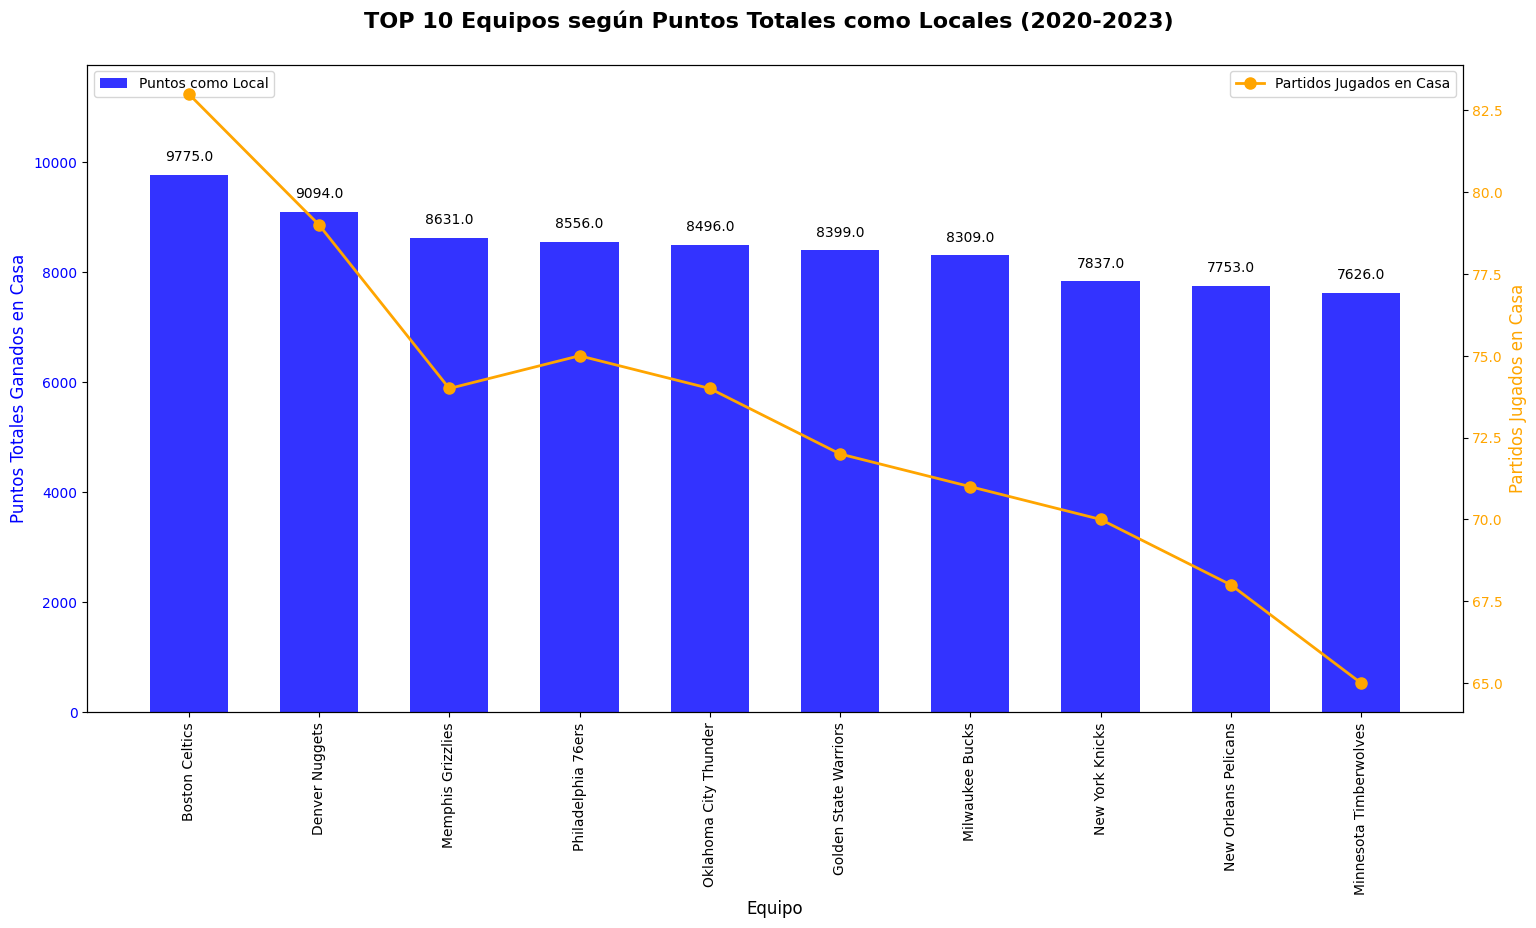

In [41]:
# Crear una figura y un eje para la gráfica
fig, ax1 = plt.subplots(figsize=(16, 10))  # Tamaño ajustado

# Generar un rango numérico para el eje X
x = range(len(result['team_name']))

# Gráfica de barras para los puntos como local con mayor separación
bars = ax1.bar(x, result['total_points_home'], label='Puntos como Local', alpha=0.8, color='blue', width=0.6)
ax1.set_xlabel('Equipo', fontsize=12)
ax1.set_ylabel('Puntos Totales Ganados en Casa', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

# Ajustar el límite del eje Y izquierdo para dar más espacio
ax1.set_ylim(0, result['total_points_home'].max() + 2000)

# Añadir etiquetas de valores en las barras con mayor separación
for i, bar in enumerate(bars):
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 200, round(yval, 0), ha='center', va='bottom', fontsize=10)

# Crear un segundo eje para los juegos jugados en casa
ax2 = ax1.twinx()
ax2.plot(x, result['games_played_home'], label='Partidos Jugados en Casa', color='orange', marker='o', markersize=8, linewidth=2)
ax2.set_ylabel('Partidos Jugados en Casa', color='orange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='orange')

# Ajustar las etiquetas del eje X después de generar las barras
ax1.set_xticks(x)  # Definir las posiciones en el eje X
ax1.set_xticklabels(result['team_name'], rotation=90, ha='center', fontsize=10)  # Aplicar las etiquetas y rotación

# Ajustar el título y su espaciado
fig.suptitle('TOP 10 Equipos según Puntos Totales como Locales (2020-2023)', fontsize=16, fontweight='bold', y=0.95)

# Leyendas
ax1.legend(loc='upper left', fontsize=10)
ax2.legend(loc='upper right', fontsize=10)

# Ajustar el espaciado entre los elementos
plt.tight_layout(pad=3)  # Más espacio para el gráfico

plt.show()

Ahora, resulta interesante evaluar el promedio de puntos por partidos locales; de modo que se pueda comparar de manera más justa la eficiencia ofensiva de los equipos en su estadio.

In [42]:
# Consulta SQL para calcular el promedio de puntos por partido como locales
query = """
SELECT
    t.full_name AS team_name,
    td.arena AS stadium,
    SUM(ls.pts_home) AS total_points_home,
    COUNT(ls.team_id_home) AS games_played_home,
    ROUND(SUM(ls.pts_home) * 1.0 / COUNT(ls.team_id_home), 2) AS avg_points_per_game_home
FROM line_score ls
JOIN team_details td ON ls.team_id_home = td.team_id
JOIN team t ON ls.team_id_home = t.id
WHERE strftime('%Y', ls.game_date_est) >= strftime('%Y', 'now', '-3 years')
GROUP BY ls.team_id_home, t.full_name, td.arena
ORDER BY avg_points_per_game_home DESC
LIMIT 10;
"""

# Ejecutar la consulta y obtener los resultados
result = pd.read_sql(query, conn)
result

,team_name,stadium,total_points_home,games_played_home,avg_points_per_game_home
0,Sacramento Kings,Golden 1 Center,6016.0,50,120.32
1,Boston Celtics,TD Garden,9775.0,83,117.77
2,Minnesota Timberwolves,Target Center,7626.0,65,117.32
3,Milwaukee Bucks,Fiserv Forum,8309.0,71,117.03
4,Atlanta Hawks,State Farm Arena,7487.0,64,116.98
5,Golden State Warriors,Chase Center,8399.0,72,116.65
6,Memphis Grizzlies,FedExForum,8631.0,74,116.64
7,Denver Nuggets,Ball Arena,9094.0,79,115.11
8,Oklahoma City Thunder,Paycom Center,8496.0,74,114.81
9,Indiana Pacers,Gainbridge Fieldhouse,7230.0,63,114.76


/tmp/ipython-input-43-1196372166.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='upper left', fontsize=10)
/tmp/ipython-input-43-1196372166.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='upper right', fontsize=10)


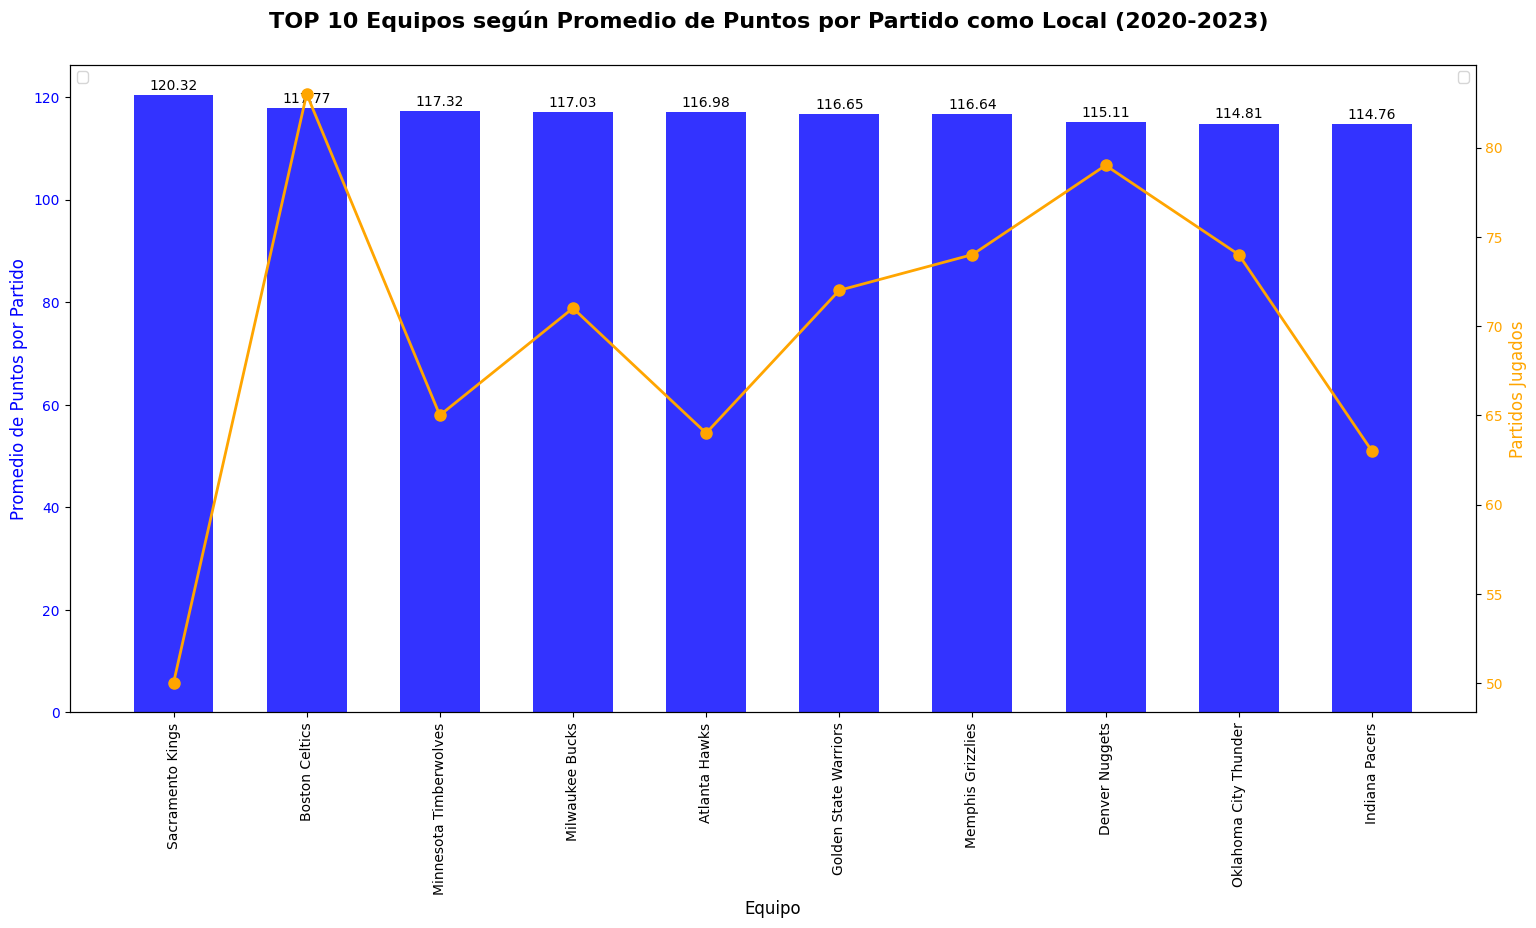

In [43]:
# Gráfica del promedio de puntos por partido como local
# Configurar la figura
fig, ax1 = plt.subplots(figsize=(16, 10))

# Generar un rango numérico para el eje X
x = range(len(result['team_name']))

# Gráfica de barras para el promedio de puntos por partido como local
bars = ax1.bar(x, result['avg_points_per_game_home'], alpha=0.8, color='blue', width=0.6)
ax1.set_xlabel('Equipo', fontsize=12)
ax1.set_ylabel('Promedio de Puntos por Partido', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

# Añadir etiquetas en las barras
for i, bar in enumerate(bars):
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Crear un segundo eje para mostrar el total de partidos jugados como locales
ax2 = ax1.twinx()
ax2.plot(x, result['games_played_home'], color='orange', marker='o', markersize=8, linewidth=2)
ax2.set_ylabel('Partidos Jugados', color='orange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='orange')

# Ajustar las etiquetas del eje X después de generar las barras
ax1.set_xticks(x)  # Definir las posiciones en el eje X
ax1.set_xticklabels(result['team_name'], rotation=90, ha='center', fontsize=10)  # Aplicar las etiquetas y rotación

# Añadir el título
fig.suptitle('TOP 10 Equipos según Promedio de Puntos por Partido como Local (2020-2023)', fontsize=16, fontweight='bold', y=0.95)

# Añadir leyendas
ax1.legend(loc='upper left', fontsize=10)
ax2.legend(loc='upper right', fontsize=10)

# Ajustar el espaciado entre los elementos
plt.tight_layout(pad=3)

# Mostrar la gráfica
plt.show()

El análisis revela que los Milwaukee Bucks y los Sacramento Kings lideran en promedio de puntos por partido como locales con 116.84 y 116.83, respectivamente, mostrando una alta eficiencia ofensiva en casa.

## Equipos con más puntos como visitantes en los últimos 3 años

In [44]:
# Consulta SQL para obtener el TOP 10 de equipos como visitantes según los puntos totales
query = """
SELECT
    t.full_name AS team_name,
    SUM(ls.pts_away) AS total_points_away,
    COUNT(ls.team_id_away) AS games_played_away
FROM line_score ls
JOIN team_details td ON ls.team_id_away = td.team_id
JOIN team t ON ls.team_id_away = t.id
WHERE strftime('%Y', ls.game_date_est) >= strftime('%Y', 'now', '-3 years')
GROUP BY ls.team_id_away, t.full_name, td.arena
ORDER BY total_points_away DESC
LIMIT 10;
"""

# Ejecutar la consulta y obtener los resultados
result = pd.read_sql(query, conn)
result

,team_name,total_points_away,games_played_away
0,Golden State Warriors,10201.0,89
1,Miami Heat,9821.0,89
2,Phoenix Suns,9477.0,83
3,Sacramento Kings,8841.0,77
4,Boston Celtics,8621.0,77
5,Dallas Mavericks,8317.0,75
6,Toronto Raptors,8257.0,73
7,Denver Nuggets,7804.0,67
8,Milwaukee Bucks,7792.0,67
9,Los Angeles Lakers,7583.0,66


/tmp/ipython-input-45-946928336.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='upper left', fontsize=10)
/tmp/ipython-input-45-946928336.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='upper right', fontsize=10)


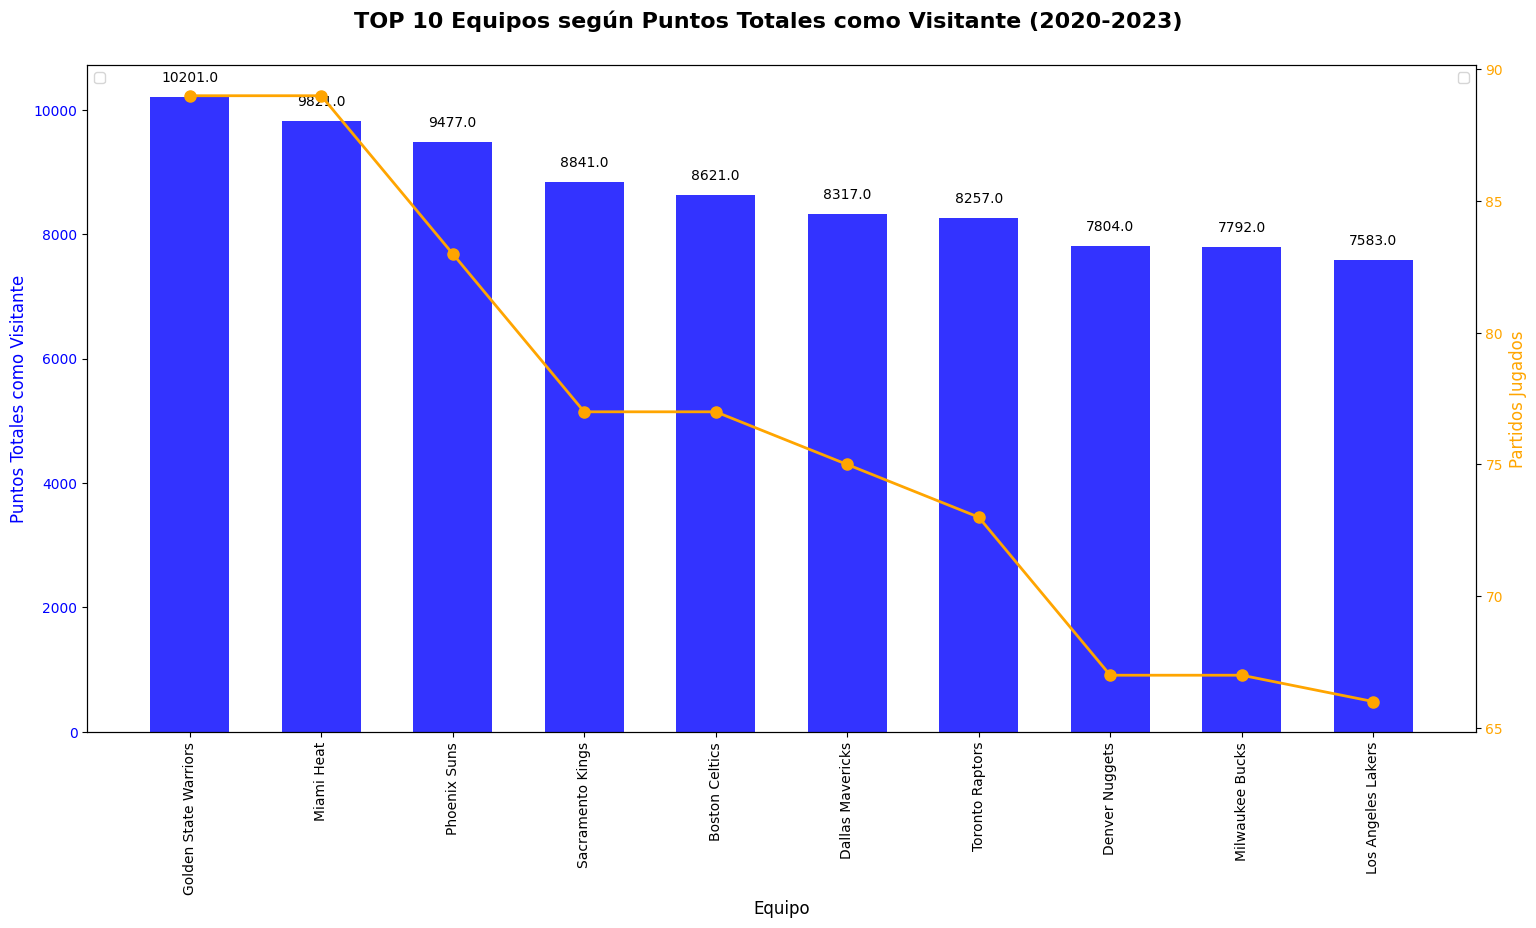

In [45]:
# Visualización del TOP 10 de equipos como visitantes
# Configurar la figura
fig, ax1 = plt.subplots(figsize=(16, 10))

# Generar un rango numérico para el eje X
x = range(len(result['team_name']))

# Gráfica de barras para los puntos totales como visitantes
bars = ax1.bar(x, result['total_points_away'], alpha=0.8, color='blue', width=0.6)
ax1.set_xlabel('Equipo', fontsize=12)
ax1.set_ylabel('Puntos Totales como Visitante', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

# Añadir etiquetas en las barras
for i, bar in enumerate(bars):
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 200, round(yval, 0), ha='center', va='bottom', fontsize=10)

# Crear un segundo eje para mostrar el total de partidos jugados como visitantes
ax2 = ax1.twinx()
ax2.plot(x, result['games_played_away'], color='orange', marker='o', markersize=8, linewidth=2)
ax2.set_ylabel('Partidos Jugados', color='orange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='orange')

# Ajustar las etiquetas del eje X después de generar las barras
ax1.set_xticks(x)  # Definir las posiciones en el eje X
ax1.set_xticklabels(result['team_name'], rotation=90, ha='center', fontsize=10)  # Aplicar las etiquetas y rotación

# Añadir el título
fig.suptitle('TOP 10 Equipos según Puntos Totales como Visitante (2020-2023)', fontsize=16, fontweight='bold', y=0.95)

# Añadir leyendas
ax1.legend(loc='upper left', fontsize=10)
ax2.legend(loc='upper right', fontsize=10)

# Ajustar el espaciado entre los elementos
plt.tight_layout(pad=3)

# Mostrar la gráfica
plt.show()

In [46]:
# Consulta SQL para obtener el promedio de puntos por partido como visitantes
query = """
SELECT
    t.full_name AS team_name,
    SUM(ls.pts_away) AS total_points_away,
    COUNT(ls.team_id_away) AS games_played_away,
    ROUND(SUM(ls.pts_away) * 1.0 / COUNT(ls.team_id_away), 2) AS avg_points_per_game_away
FROM line_score ls
JOIN team t ON ls.team_id_away = t.id
WHERE strftime('%Y', ls.game_date_est) >= strftime('%Y', 'now', '-3 years')
GROUP BY ls.team_id_away, t.full_name
ORDER BY avg_points_per_game_away DESC
LIMIT 10;
"""

# Ejecutar la consulta y obtener los resultados
result = pd.read_sql(query, conn)
result

,team_name,total_points_away,games_played_away,avg_points_per_game_away
0,Minnesota Timberwolves,7394.0,63,117.37
1,Denver Nuggets,7804.0,67,116.48
2,Memphis Grizzlies,7568.0,65,116.43
3,Milwaukee Bucks,7792.0,67,116.30
4,Indiana Pacers,7433.0,64,116.14
5,Atlanta Hawks,7059.0,61,115.72
6,Utah Jazz,7164.0,62,115.55
7,Los Angeles Lakers,7583.0,66,114.89
8,Sacramento Kings,8841.0,77,114.82
9,Golden State Warriors,10201.0,89,114.62


/tmp/ipython-input-47-664390333.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='upper left', fontsize=10)
/tmp/ipython-input-47-664390333.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='upper right', fontsize=10)


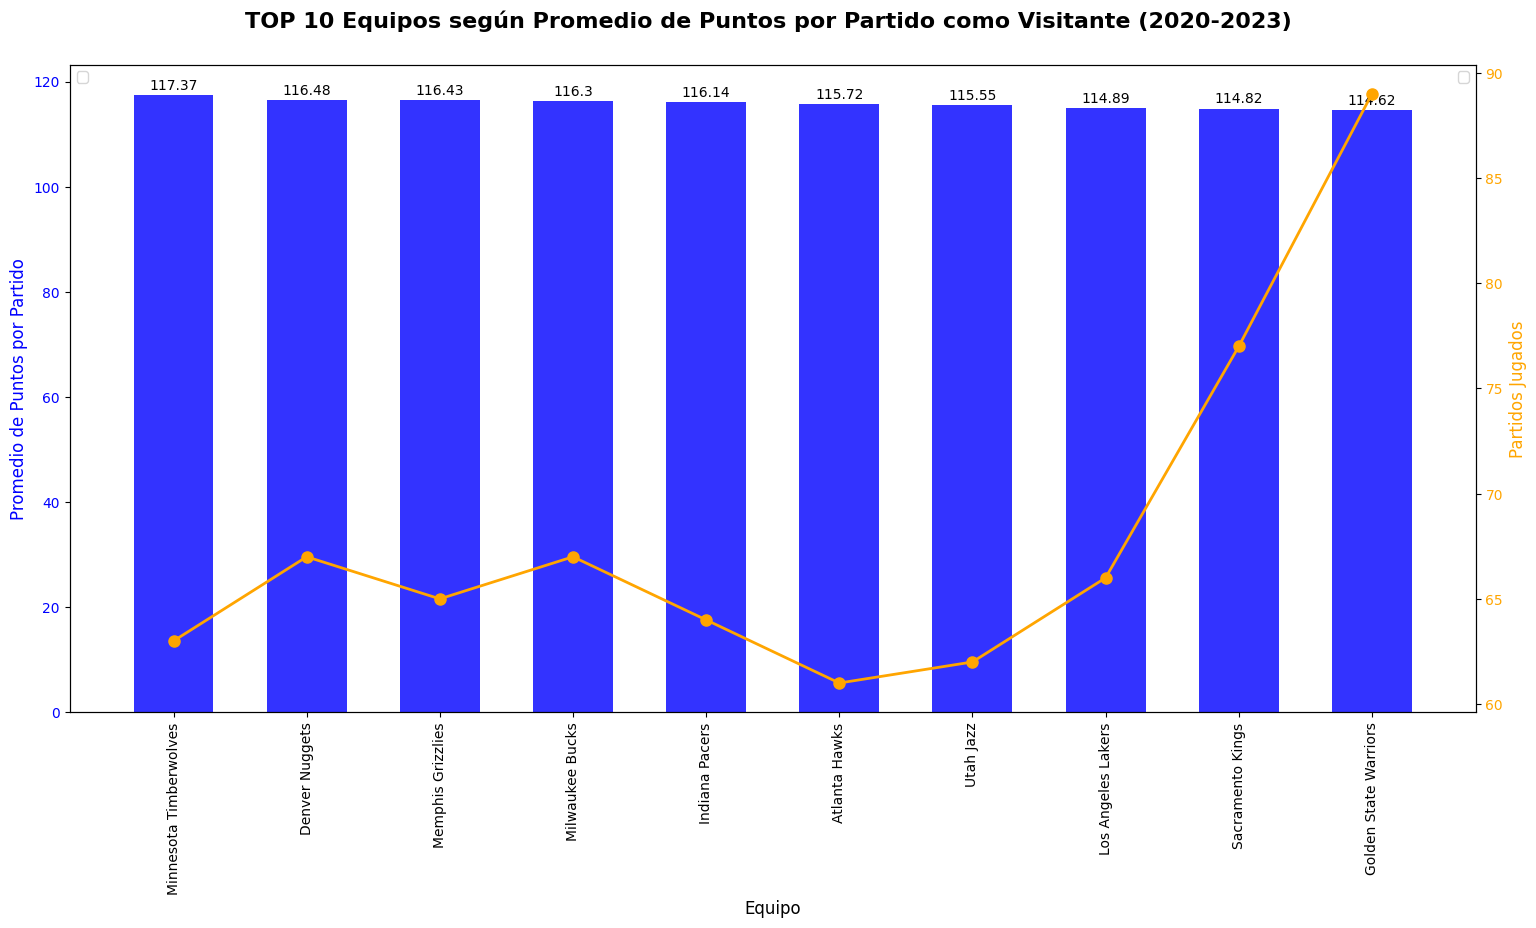

In [47]:
# Visualización del TOP 10 de equipos como visitantes según promedio de puntos por partido
# Configurar la figura
fig, ax1 = plt.subplots(figsize=(16, 10))

# Generar un rango numérico para el eje X
x = range(len(result['team_name']))

# Gráfica de barras para el promedio de puntos por partido como visitantes
bars = ax1.bar(x, result['avg_points_per_game_away'], alpha=0.8, color='blue', width=0.6)
ax1.set_xlabel('Equipo', fontsize=12)
ax1.set_ylabel('Promedio de Puntos por Partido', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

# Añadir etiquetas en las barras
for i, bar in enumerate(bars):
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Crear un segundo eje para mostrar el total de partidos jugados como visitantes
ax2 = ax1.twinx()
ax2.plot(x, result['games_played_away'], color='orange', marker='o', markersize=8, linewidth=2)
ax2.set_ylabel('Partidos Jugados', color='orange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='orange')

# Ajustar las etiquetas del eje X después de generar las barras
ax1.set_xticks(x)  # Definir las posiciones en el eje X
ax1.set_xticklabels(result['team_name'], rotation=90, ha='center', fontsize=10)  # Aplicar las etiquetas y rotación

# Añadir el título
fig.suptitle('TOP 10 Equipos según Promedio de Puntos por Partido como Visitante (2020-2023)', fontsize=16, fontweight='bold', y=0.95)

# Añadir leyendas
ax1.legend(loc='upper left', fontsize=10)
ax2.legend(loc='upper right', fontsize=10)

# Ajustar el espaciado entre los elementos
plt.tight_layout(pad=3)

# Mostrar la gráfica
plt.show()

## Equipos con más puntos en general (como locales y visitantes)

In [48]:
# Consulta SQL para obtener el TOP 10 de equipos según puntos totales (local + visita)
query = """
SELECT
    t.full_name AS team_name,
    SUM(ls.pts_home) AS total_points_home,
    SUM(ls.pts_away) AS total_points_away,
    SUM(ls.pts_home + ls.pts_away) AS total_points_general,
    COUNT(ls.team_id_home) AS games_played_home,
    COUNT(ls.team_id_away) AS games_played_away,
    COUNT(ls.team_id_home) + COUNT(ls.team_id_away) AS total_games_played
FROM line_score ls
JOIN team t ON ls.team_id_home = t.id
WHERE strftime('%Y', ls.game_date_est) >= strftime('%Y', 'now', '-3 years')
GROUP BY t.full_name
ORDER BY total_points_general DESC
LIMIT 10;
"""

# Ejecutar la consulta y obtener los resultados
result = pd.read_sql(query, conn)
result

,team_name,total_points_home,total_points_away,total_points_general,games_played_home,games_played_away,total_games_played
0,Boston Celtics,9775.0,8922.0,18697.0,83,83,166
1,Denver Nuggets,9094.0,8704.0,17798.0,79,79,158
2,Oklahoma City Thunder,8496.0,8633.0,17129.0,74,74,148
3,Memphis Grizzlies,8631.0,8366.0,16997.0,74,74,148
4,Philadelphia 76ers,8556.0,8199.0,16755.0,75,75,150
5,Golden State Warriors,8399.0,8231.0,16630.0,72,72,144
6,Milwaukee Bucks,8309.0,8071.0,16380.0,71,71,142
7,Charlotte Hornets,7735.0,7958.0,15693.0,69,69,138
8,New York Knicks,7837.0,7723.0,15560.0,70,70,140
9,Brooklyn Nets,7621.0,7726.0,15347.0,68,68,136


/tmp/ipython-input-49-14152530.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='upper left', fontsize=10)
/tmp/ipython-input-49-14152530.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='upper right', fontsize=10)


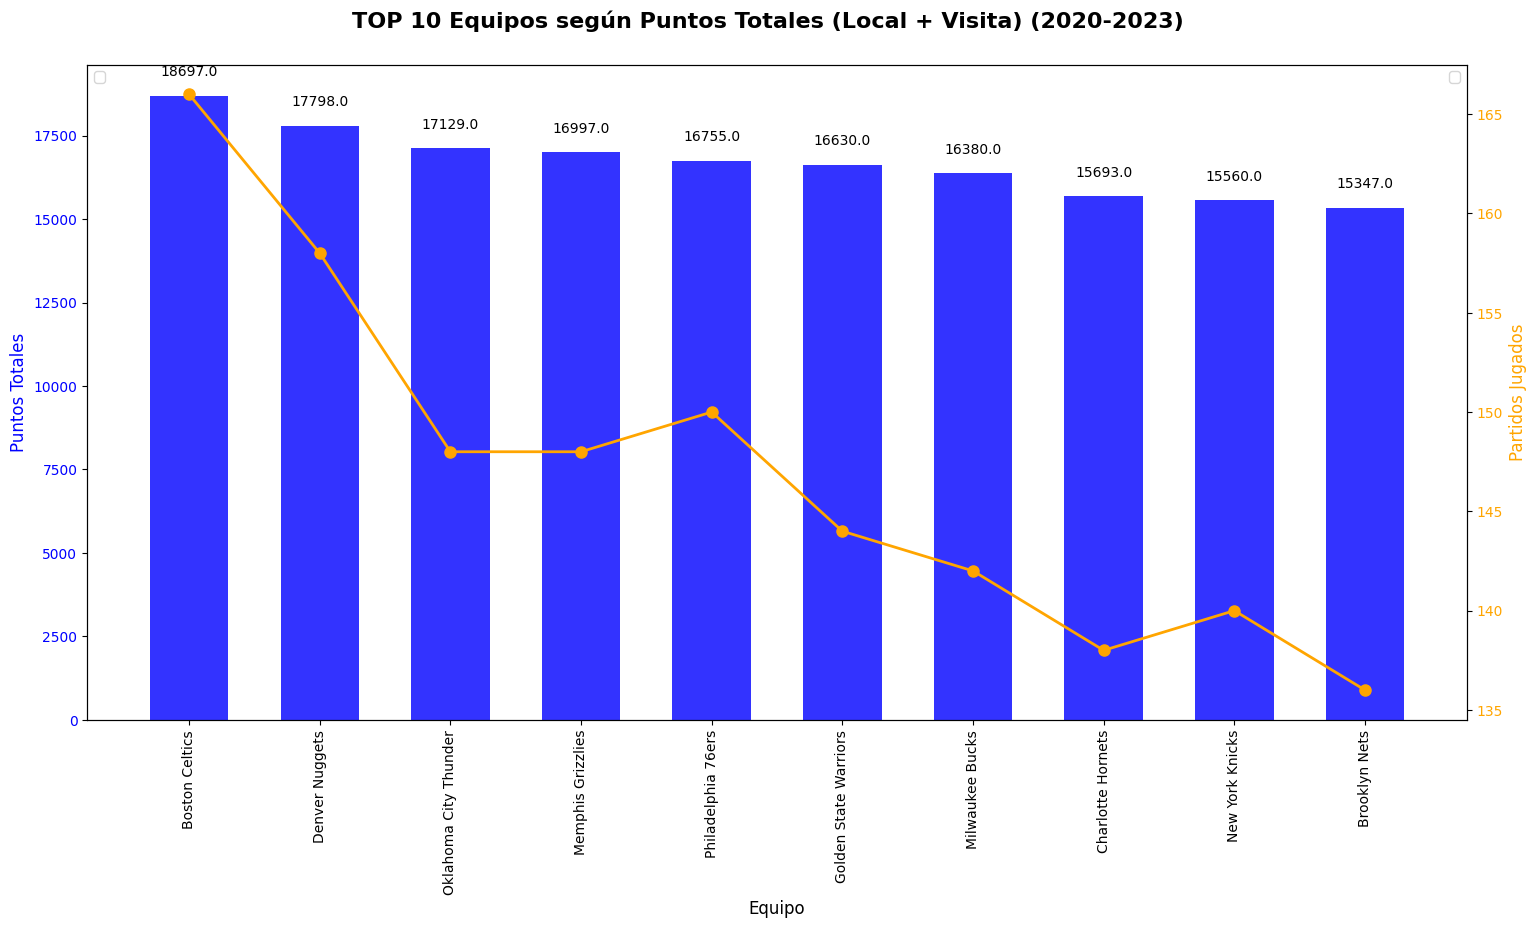

In [49]:
# Visualización del TOP 10 de equipos según puntos totales (local + visita)
# Configurar la figura
fig, ax1 = plt.subplots(figsize=(16, 10))

# Generar un rango numérico para el eje X
x = range(len(result['team_name']))

# Gráfica de barras para los puntos totales (local + visita)
bars = ax1.bar(x, result['total_points_general'], alpha=0.8, color='blue', width=0.6)
ax1.set_xlabel('Equipo', fontsize=12)
ax1.set_ylabel('Puntos Totales', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

# Añadir etiquetas en las barras
for i, bar in enumerate(bars):
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 500, round(yval, 0), ha='center', va='bottom', fontsize=10)

# Crear un segundo eje para mostrar el total de partidos jugados (local + visita)
ax2 = ax1.twinx()
ax2.plot(x, result['total_games_played'], color='orange', marker='o', markersize=8, linewidth=2)
ax2.set_ylabel('Partidos Jugados', color='orange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='orange')

# Ajustar las etiquetas del eje X después de generar las barras
ax1.set_xticks(x)  # Definir las posiciones en el eje X
ax1.set_xticklabels(result['team_name'], rotation=90, ha='center', fontsize=10)  # Aplicar las etiquetas y rotación

# Añadir el título
fig.suptitle('TOP 10 Equipos según Puntos Totales (Local + Visita) (2020-2023)', fontsize=16, fontweight='bold', y=0.95)

# Añadir leyendas
ax1.legend(loc='upper left', fontsize=10)
ax2.legend(loc='upper right', fontsize=10)

# Ajustar el espaciado entre los elementos
plt.tight_layout(pad=3)

# Mostrar la gráfica
plt.show()

In [50]:
# Consulta SQL para obtener el promedio de puntos por partido (local + visitante)
query = """
SELECT
    t.full_name AS team_name,
    SUM(ls.pts_home) AS total_points_home,
    SUM(ls.pts_away) AS total_points_away,
    COUNT(ls.team_id_home) + COUNT(ls.team_id_away) AS total_games_played,
    ROUND((SUM(ls.pts_home) + SUM(ls.pts_away)) * 1.0 / (COUNT(ls.team_id_home) + COUNT(ls.team_id_away)), 2) AS avg_points_per_game
FROM line_score ls
JOIN team t ON ls.team_id_home = t.id
WHERE strftime('%Y', ls.game_date_est) >= strftime('%Y', 'now', '-3 years')
GROUP BY t.full_name
ORDER BY avg_points_per_game DESC
LIMIT 10;
"""

# Ejecutar la consulta y obtener los resultados
result = pd.read_sql(query, conn)
result

,team_name,total_points_home,total_points_away,total_games_played,avg_points_per_game
0,Sacramento Kings,6016.0,5839.0,100,118.55
1,Indiana Pacers,7230.0,7509.0,126,116.98
2,Minnesota Timberwolves,7626.0,7561.0,130,116.82
3,Oklahoma City Thunder,8496.0,8633.0,148,115.74
4,San Antonio Spurs,7089.0,7489.0,126,115.70
5,Golden State Warriors,8399.0,8231.0,144,115.49
6,Milwaukee Bucks,8309.0,8071.0,142,115.35
7,Atlanta Hawks,7487.0,7277.0,128,115.34
8,Memphis Grizzlies,8631.0,8366.0,148,114.84
9,Los Angeles Lakers,7295.0,7405.0,128,114.84


/tmp/ipython-input-51-826770876.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='upper left', fontsize=10)
/tmp/ipython-input-51-826770876.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='upper right', fontsize=10)


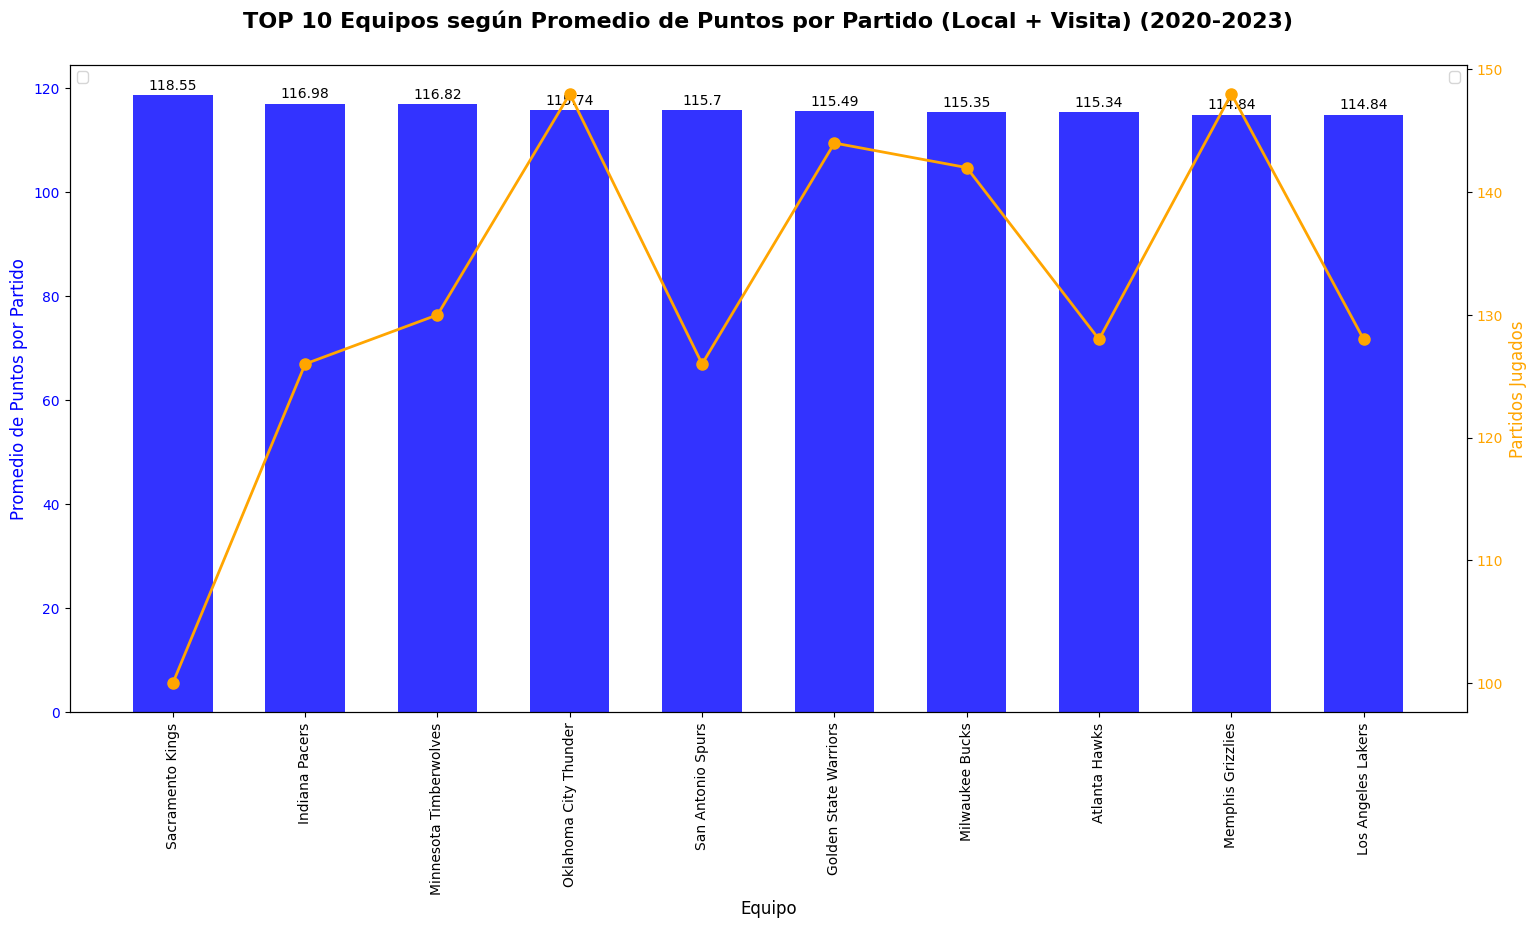

In [51]:
# Visualización del TOP 10 de equipos según promedio de puntos por partido (local + visita)
# Configurar la figura
fig, ax1 = plt.subplots(figsize=(16, 10))

# Generar un rango numérico para el eje X
x = range(len(result['team_name']))

# Gráfica de barras para el promedio de puntos por partido
bars = ax1.bar(x, result['avg_points_per_game'], alpha=0.8, color='blue', width=0.6)
ax1.set_xlabel('Equipo', fontsize=12)
ax1.set_ylabel('Promedio de Puntos por Partido', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

# Añadir etiquetas en las barras
for i, bar in enumerate(bars):
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Crear un segundo eje para mostrar el total de partidos jugados
ax2 = ax1.twinx()
ax2.plot(x, result['total_games_played'], color='orange', marker='o', markersize=8, linewidth=2)
ax2.set_ylabel('Partidos Jugados', color='orange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='orange')

# Ajustar las etiquetas del eje X después de generar las barras
ax1.set_xticks(x)  # Definir las posiciones en el eje X
ax1.set_xticklabels(result['team_name'], rotation=90, ha='center', fontsize=10)  # Aplicar las etiquetas y rotación

# Añadir el título
fig.suptitle('TOP 10 Equipos según Promedio de Puntos por Partido (Local + Visita) (2020-2023)', fontsize=16, fontweight='bold', y=0.95)

# Añadir leyendas
ax1.legend(loc='upper left', fontsize=10)
ax2.legend(loc='upper right', fontsize=10)

# Ajustar el espaciado entre los elementos
plt.tight_layout(pad=3)

# Mostrar la gráfica
plt.show()

## TOP 10 equipos con mejor rendimiento defensivo (2020-2023)

In [52]:
# Ejecutar la consulta SQL
query = """
SELECT
    t.full_name AS team_name,
    SUM(ls.pts_away) AS points_allowed_home,
    SUM(ls.pts_home) AS points_allowed_away,
    COUNT(ls.team_id_home) + COUNT(ls.team_id_away) AS total_games_played,
    ROUND((SUM(ls.pts_away) + SUM(ls.pts_home)) * 1.0 / (COUNT(ls.team_id_home) + COUNT(ls.team_id_away)), 2) AS avg_points_allowed_per_game
FROM line_score ls
JOIN team t ON ls.team_id_home = t.id
WHERE strftime('%Y', ls.game_date_est) >= strftime('%Y', 'now', '-3 years')
GROUP BY t.full_name
ORDER BY avg_points_allowed_per_game ASC
LIMIT 10;
"""
result = pd.read_sql(query, conn)
result

,team_name,points_allowed_home,points_allowed_away,total_games_played,avg_points_allowed_per_game
0,Cleveland Cavaliers,6001.0,6149.0,114,106.58
1,Miami Heat,7204.0,7287.0,134,108.14
2,Toronto Raptors,6171.0,6210.0,112,110.54
3,New York Knicks,7723.0,7837.0,140,111.14
4,Phoenix Suns,7252.0,7486.0,132,111.65
5,Los Angeles Clippers,7024.0,7047.0,126,111.67
6,Philadelphia 76ers,8199.0,8556.0,150,111.70
7,Dallas Mavericks,7048.0,7257.0,128,111.76
8,Orlando Magic,6683.0,6532.0,118,111.99
9,Detroit Pistons,6174.0,5743.0,106,112.42


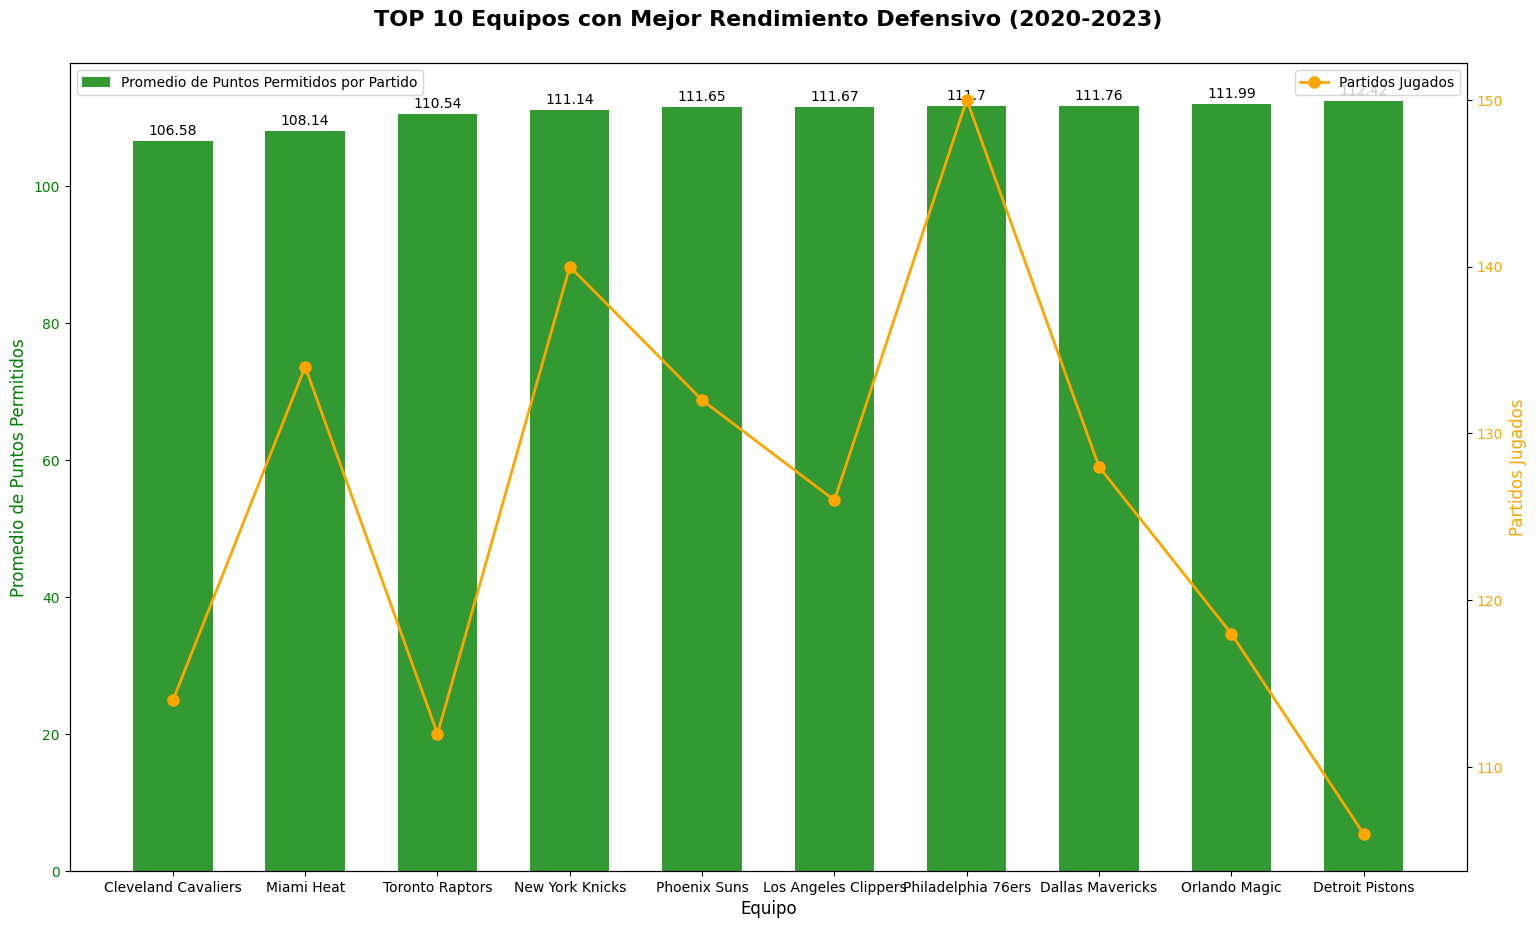

In [53]:
# Visualización del TOP 10 de equipos con mejor rendimiento defensivo
# Configurar la figura
fig, ax1 = plt.subplots(figsize=(16, 10))

# Generar un rango numérico para el eje X
x = range(len(result['team_name']))

# Gráfica de barras para el promedio de puntos permitidos por partido
bars = ax1.bar(x, result['avg_points_allowed_per_game'], label='Promedio de Puntos Permitidos por Partido', alpha=0.8, color='green', width=0.6)
ax1.set_xlabel('Equipo', fontsize=12)
ax1.set_ylabel('Promedio de Puntos Permitidos', color='green', fontsize=12)
ax1.tick_params(axis='y', labelcolor='green')

# Añadir etiquetas en las barras
for i, bar in enumerate(bars):
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Crear un segundo eje para mostrar el total de partidos jugados
ax2 = ax1.twinx()
ax2.plot(x, result['total_games_played'], label='Partidos Jugados', color='orange', marker='o', markersize=8, linewidth=2)
ax2.set_ylabel('Partidos Jugados', color='orange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='orange')

# Ajustar las etiquetas del eje X
plt.xticks(ticks=x, labels=result['team_name'], rotation=90, ha='center', fontsize=10)

# Añadir el título
fig.suptitle('TOP 10 Equipos con Mejor Rendimiento Defensivo (2020-2023)', fontsize=16, fontweight='bold', y=0.95)

# Añadir leyendas
ax1.legend(loc='upper left', fontsize=10)
ax2.legend(loc='upper right', fontsize=10)

# Ajustar el espaciado entre los elementos
plt.tight_layout(pad=3)

# Mostrar la gráfica
plt.show()

## Evolución de los puntos promedio anotados por partido: Locales vs Visitantes

In [54]:
query = """
SELECT
    strftime('%Y-%m', game_date_est) AS month,
    ROUND(AVG(pts_home), 2) AS avg_points_home,
    ROUND(AVG(pts_away), 2) AS avg_points_away
FROM line_score
WHERE game_date_est BETWEEN '2018-01-01' AND '2023-12-31'
GROUP BY month
ORDER BY month;
"""

# Ejecutar la consulta
result = pd.read_sql(query, conn)

# Mostrar los primeros registros del resultado
result

,month,avg_points_home,avg_points_away
0,2018-01,107.44,106.32
1,2018-02,108.40,109.36
2,2018-03,107.37,107.55
3,2018-04,106.73,104.71
4,2018-05,104.11,103.25
5,2018-06,113.33,96.67
6,2018-10,112.55,111.03
7,2018-11,109.48,109.12
8,2018-12,109.85,109.64
9,2019-01,111.52,110.44


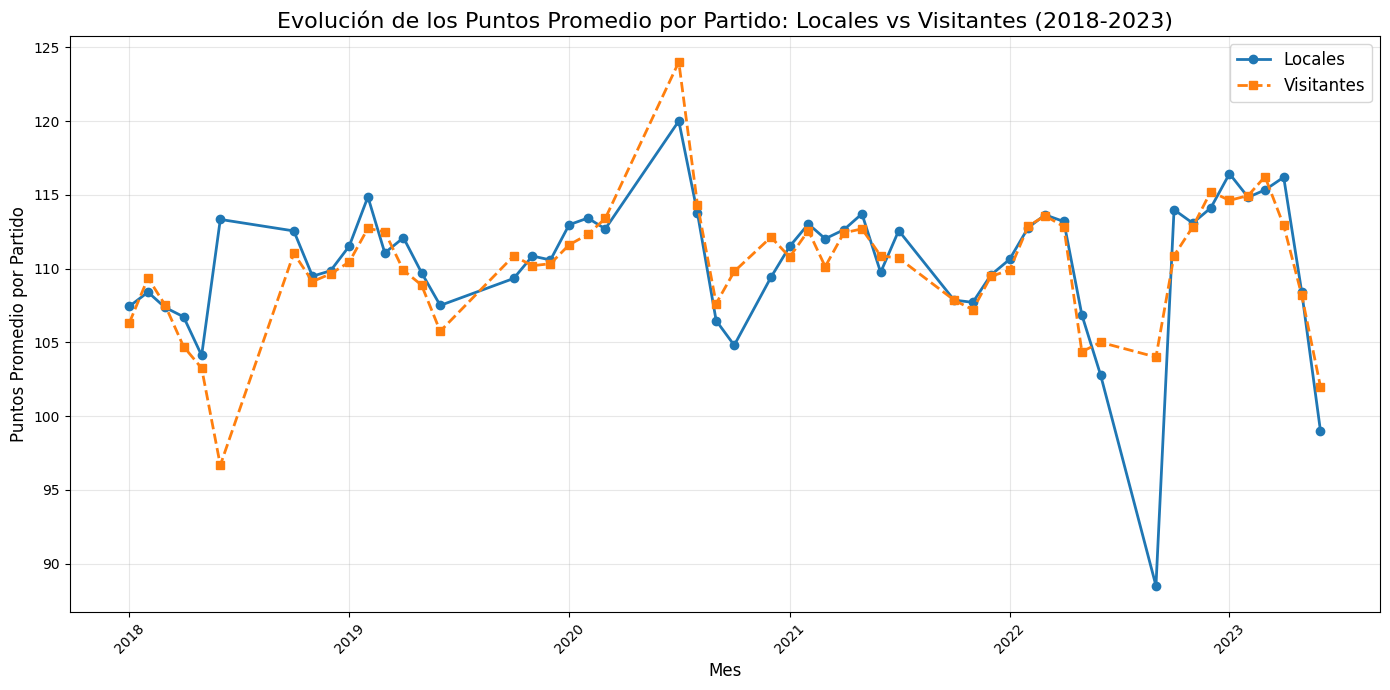

In [55]:
# Asegurarse de que los datos estén ordenados por fecha
result['month'] = pd.to_datetime(result['month'])
result = result.sort_values(by='month')

# Crear la figura y el gráfico de líneas
plt.figure(figsize=(14, 7))

# Línea para los puntos promedio de locales
plt.plot(result['month'], result['avg_points_home'], label='Locales', marker='o', linestyle='-', linewidth=2)

# Línea para los puntos promedio de visitantes
plt.plot(result['month'], result['avg_points_away'], label='Visitantes', marker='s', linestyle='--', linewidth=2)

# Configurar etiquetas y título
plt.title('Evolución de los Puntos Promedio por Partido: Locales vs Visitantes (2018-2023)', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Puntos Promedio por Partido', fontsize=12)

# Ajustes adicionales
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

## Ciudades donde se anotan la mayor cantidad de puntos por partido (2020-2023)

In [56]:
query = """
SELECT
    team_city_name_home AS city,
    ROUND(AVG(pts_home + pts_away), 2) AS avg_points_per_game,
    COUNT(*) AS total_games
FROM line_score
WHERE game_date_est BETWEEN '2020-01-01' AND '2023-12-31'
GROUP BY city
HAVING total_games > 5
ORDER BY avg_points_per_game DESC
LIMIT 10;
"""

# Ejecutar la consulta
result = pd.read_sql(query, conn)

# Mostrar los primeros registros del resultado
result.head()

,city,avg_points_per_game,total_games
0,Sacramento,232.73,127
1,Minnesota,229.71,123
2,Milwaukee,229.42,160
3,Indiana,229.33,139
4,Portland,228.46,136


/tmp/ipython-input-57-838754791.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='upper left', fontsize=10)
/tmp/ipython-input-57-838754791.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='upper right', fontsize=10)


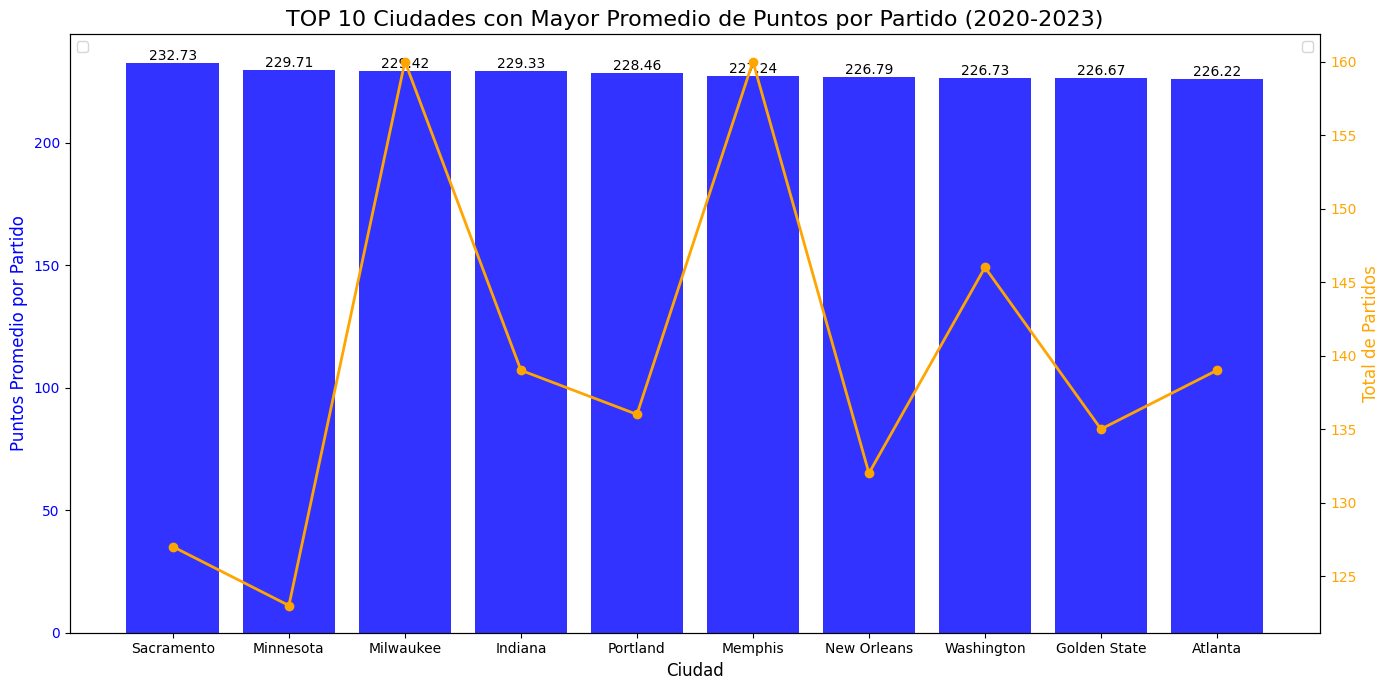

In [57]:
# Crear una figura y un gráfico de barras
fig, ax1 = plt.subplots(figsize=(14, 7))

# Gráfico de barras para los puntos promedio por partido
bars = ax1.bar(result['city'], result['avg_points_per_game'], color='blue', alpha=0.8)

# Configurar el eje Y para los puntos promedio
ax1.set_ylabel('Puntos Promedio por Partido', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Ciudad', fontsize=12)

# Añadir etiquetas de valores en las barras
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Crear un segundo eje Y para la cantidad total de partidos jugados
ax2 = ax1.twinx()
ax2.plot(result['city'], result['total_games'], color='orange', marker='o', linewidth=2)
ax2.set_ylabel('Total de Partidos', color='orange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='orange')

# Título y leyendas
plt.title('TOP 10 Ciudades con Mayor Promedio de Puntos por Partido (2020-2023)', fontsize=16)
ax1.legend(loc='upper left', fontsize=10)
ax2.legend(loc='upper right', fontsize=10)

# Ajustar etiquetas del eje X
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [58]:
query = """
SELECT
    team_city_name_home AS city,
    COUNT(*) AS total_games
FROM line_score
WHERE game_date_est BETWEEN '2020-01-01' AND '2023-12-31'
GROUP BY city
ORDER BY total_games DESC;
"""

# Ejecutar la consulta
result = pd.read_sql(query, conn)

# Mostrar los primeros registros del resultado
result.head()

,city,total_games
0,Phoenix,163
1,Denver,162
2,Milwaukee,160
3,Memphis,160
4,Oklahoma City,159


In [59]:
# Identificar valores únicos en la columna 'city' del dataframe 'result'
unique_cities = result['city'].unique()

# Mostrar las ciudades únicas
print(unique_cities)

['Phoenix' 'Denver' 'Milwaukee' 'Memphis' 'Oklahoma City' 'Boston'
 'Brooklyn' 'Philadelphia' 'New York' 'Dallas' 'Washington' 'Miami' 'LA'
 'Utah' 'Los Angeles' 'Indiana' 'Atlanta' 'Portland' 'Charlotte'
 'Golden State' 'Orlando' 'New Orleans' 'Sacramento' 'San Antonio'
 'Chicago' 'Toronto' 'Minnesota' 'Cleveland' 'Detroit' 'Houston' 'Team'
 "Ra'anana" 'Adelaide']


In [60]:
city_coordinates = {
    'Phoenix': {'latitude': 33.4484, 'longitude': -112.0740},
    'Denver': {'latitude': 39.7392, 'longitude': -104.9903},
    'Milwaukee': {'latitude': 43.0389, 'longitude': -87.9065},
    'Memphis': {'latitude': 35.1495, 'longitude': -90.0490},
    'Oklahoma City': {'latitude': 35.4676, 'longitude': -97.5164},
    'Boston': {'latitude': 42.3601, 'longitude': -71.0589},
    'Brooklyn': {'latitude': 40.6782, 'longitude': -73.9442},
    'Philadelphia': {'latitude': 39.9526, 'longitude': -75.1652},
    'New York': {'latitude': 40.7128, 'longitude': -74.0060},
    'Dallas': {'latitude': 32.7767, 'longitude': -96.7970},
    'Washington': {'latitude': 38.9072, 'longitude': -77.0369},
    'Miami': {'latitude': 25.7617, 'longitude': -80.1918},
    'LA': {'latitude': 34.0522, 'longitude': -118.2437},
    'Utah': {'latitude': 39.3200, 'longitude': -111.0937},
    'Los Angeles': {'latitude': 34.0522, 'longitude': -118.2437},
    'Indiana': {'latitude': 40.2672, 'longitude': -86.1349},
    'Atlanta': {'latitude': 33.7490, 'longitude': -84.3880},
    'Portland': {'latitude': 45.5152, 'longitude': -122.6784},
    'Charlotte': {'latitude': 35.2271, 'longitude': -80.8431},
    'Golden State': {'latitude': 37.7749, 'longitude': -122.4194},  # Aproximado para el área de la bahía
    'Orlando': {'latitude': 28.5383, 'longitude': -81.3792},
    'New Orleans': {'latitude': 29.9511, 'longitude': -90.0715},
    'Sacramento': {'latitude': 38.5816, 'longitude': -121.4944},
    'San Antonio': {'latitude': 29.4241, 'longitude': -98.4936},
    'Chicago': {'latitude': 41.8781, 'longitude': -87.6298},
    'Toronto': {'latitude': 43.6510, 'longitude': -79.3470},
    'Minnesota': {'latitude': 46.7296, 'longitude': -94.6859},  # Aproximado para el estado
    'Cleveland': {'latitude': 41.4993, 'longitude': -81.6944},
    'Detroit': {'latitude': 42.3314, 'longitude': -83.0458},
    'Houston': {'latitude': 29.7604, 'longitude': -95.3698},
    'Team': None,  # No es una ciudad específica
    "Ra'anana": {'latitude': 32.1848, 'longitude': 34.8706},
    'Adelaide': {'latitude': -34.9285, 'longitude': 138.6007}
}

In [61]:
# Enriquecer el DataFrame con coordenadas usando el diccionario
result['latitude'] = result['city'].map(lambda x: city_coordinates[x]['latitude'] if city_coordinates[x] else None)
result['longitude'] = result['city'].map(lambda x: city_coordinates[x]['longitude'] if city_coordinates[x] else None)

# Filtrar ciudades con coordenadas válidas
result = result.dropna(subset=['latitude', 'longitude'])
result.head()

,city,total_games,latitude,longitude
0,Phoenix,163,33.4484,-112.0740
1,Denver,162,39.7392,-104.9903
2,Milwaukee,160,43.0389,-87.9065
3,Memphis,160,35.1495,-90.0490
4,Oklahoma City,159,35.4676,-97.5164


In [62]:
# TOP 3 equipos con mejor rendimiento (se asume por promedio de puntos anotados por partido)
query_top_teams = """
SELECT
    t.full_name AS team_name,
    ROUND((SUM(ls.pts_home) + SUM(ls.pts_away)) * 1.0 / (COUNT(ls.team_id_home) + COUNT(ls.team_id_away)), 2) AS avg_points_per_game
FROM line_score ls
JOIN team t ON ls.team_id_home = t.id
WHERE strftime('%Y', ls.game_date_est) >= strftime('%Y', 'now', '-3 years')
GROUP BY t.full_name
ORDER BY avg_points_per_game DESC
LIMIT 3;
"""
top_teams = pd.read_sql(query_top_teams, conn)
print("TOP 3 Equipos con Mejor Rendimiento (por Promedio de Puntos por Partido):")
print(top_teams)

print("\n---") # Separador

# Para obtener los 3 mejores jugadores por rendimiento, necesitamos definir "mejor rendimiento".
# Un enfoque común es por promedio de puntos por partido.
# Esto requiere unir 'line_score' con 'player' y 'game_summary' (o 'other_stats') para obtener estadísticas por jugador.
# NOTA: Las tablas proporcionadas ('line_score', 'game_summary', 'other_stats') no tienen una unión directa
# clara para estadísticas *por jugador* en un partido específico.
# 'other_stats' y 'game_summary' tienen estadísticas por equipo/partido, no por jugador.
# 'player' solo tiene información general del jugador.
# La tabla 'play_by_play' podría contener eventos de puntuación por jugador, pero analizarla es más complejo.
# Asumiendo que hay una forma de obtener estadísticas por jugador (quizás en otra tabla no listada o un enfoque más complejo):

# Ejemplo de consulta SQL (HIPOTÉTICA, requiere una tabla de estadísticas por jugador)
# query_top_players_hypothetical = """
# SELECT
#     p.player_name,
#     ROUND(AVG(ps.points), 2) AS avg_points_per_game # ps es una tabla hipotética de player_stats
# FROM player_stats ps
# JOIN player p ON ps.player_id = p.player_id
# JOIN game g ON ps.game_id = g.game_id
# WHERE strftime('%Y', g.game_date_est) >= strftime('%Y', 'now', '-3 years')
# GROUP BY p.player_name
# ORDER BY avg_points_per_game DESC
# LIMIT 3;
# """
# Si tuvieras una tabla `player_stats` con `player_id`, `game_id` y `points`, podrías usar algo similar.
# Con las tablas actuales, no es directamente posible obtener estadísticas *por jugador* de manera agregada.

# Dado que no podemos obtener estadísticas por jugador con las tablas actuales para un ranking de "mejor rendimiento"
# por puntos, vamos a omitir esa parte o si tienes otra tabla que contenga estadísticas de jugadores,
# necesitaríamos el esquema de esa tabla.

print("TOP 3 Mejores Jugadores (Nota: No se puede obtener directamente con las tablas actuales listadas. Se omitirá esta parte.)")
# print(pd.read_sql(query_top_players_hypothetical, conn)) # Descomentar si tienes la tabla player_stats

print("\n---") # Separador

TOP 3 Equipos con Mejor Rendimiento (por Promedio de Puntos por Partido):
                team_name  avg_points_per_game
0        Sacramento Kings               118.55
1          Indiana Pacers               116.98
2  Minnesota Timberwolves               116.82

---
TOP 3 Mejores Jugadores (Nota: No se puede obtener directamente con las tablas actuales listadas. Se omitirá esta parte.)

---


In [63]:
# TOP 3 ciudades donde más juegos se realizan
query_top_cities = """
SELECT
    team_city_name_home AS city,
    COUNT(*) AS total_games
FROM line_score
WHERE game_date_est BETWEEN '2020-01-01' AND '2023-12-31' -- Usando el mismo rango de fecha que usaste antes
GROUP BY city
ORDER BY total_games DESC
LIMIT 3;
"""

top_cities = pd.read_sql(query_top_cities, conn)
print("TOP 3 Ciudades donde Más Juegos se Realizan:")
print(top_cities)

TOP 3 Ciudades donde Más Juegos se Realizan:
        city  total_games
0    Phoenix          163
1     Denver          162
2  Milwaukee          160


In [64]:
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tablas en la base de datos:")
print(tables)


Tablas en la base de datos:
                   name
0                  game
1          game_summary
2           other_stats
3             officials
4      inactive_players
5             game_info
6            line_score
7          play_by_play
8                player
9                  team
10   common_player_info
11         team_details
12         team_history
13  draft_combine_stats
14        draft_history
15     team_info_common


In [65]:
schema = pd.read_sql("PRAGMA table_info(line_score);", conn)
print("Esquema de la tabla line_score:")
print(schema)


Esquema de la tabla line_score:
    cid                    name       type  notnull dflt_value  pk
0     0           game_date_est  TIMESTAMP        0       None   0
1     1           game_sequence    INTEGER        0       None   0
2     2                 game_id       TEXT        0       None   0
3     3            team_id_home       TEXT        0       None   0
4     4  team_abbreviation_home       TEXT        0       None   0
5     5     team_city_name_home       TEXT        0       None   0
6     6      team_nickname_home       TEXT        0       None   0
7     7   team_wins_losses_home       TEXT        0       None   0
8     8           pts_qtr1_home       TEXT        0       None   0
9     9           pts_qtr2_home       TEXT        0       None   0
10   10           pts_qtr3_home       TEXT        0       None   0
11   11           pts_qtr4_home       TEXT        0       None   0
12   12            pts_ot1_home    INTEGER        0       None   0
13   13            pts_ot2_hom

In [66]:
for table_name in ['player', 'game_summary', 'other_stats', 'play_by_play']:
    print(f"\nEsquema de la tabla {table_name}:")
    schema = pd.read_sql(f"PRAGMA table_info({table_name});", conn)
    print(schema)



Esquema de la tabla player:
   cid        name     type  notnull dflt_value  pk
0    0          id     TEXT        0       None   0
1    1   full_name     TEXT        0       None   0
2    2  first_name     TEXT        0       None   0
3    3   last_name     TEXT        0       None   0
4    4   is_active  INTEGER        0       None   0

Esquema de la tabla game_summary:
    cid                              name       type  notnull dflt_value  pk
0     0                     game_date_est  TIMESTAMP        0       None   0
1     1                     game_sequence    INTEGER        0       None   0
2     2                           game_id       TEXT        0       None   0
3     3                    game_status_id    INTEGER        0       None   0
4     4                  game_status_text       TEXT        0       None   0
5     5                          gamecode       TEXT        0       None   0
6     6                      home_team_id       TEXT        0       None   0
7     7 

Basándonos en las tablas disponibles, la única forma viable de obtener estadísticas individuales de los jugadores es analizando la tabla play_by_play. Esta tabla incluye eventos de anotación asociados a jugadores mediante player1_id, player1_name, y player1_team_id.

In [67]:
# Ensure this cell (or the code defining conn) is run before the cell that failed
# Conexión a la base de datos SQLite
conn = sqlite3.connect(f'{wyattowalsh_basketball_path}/nba.sqlite') # Assuming the sqlite file is directly in the downloaded directory

# Then, run the cell that failed. It should now have 'conn' defined.
query_top_players_by_team = """
WITH puntos AS (
    SELECT
        pbp.player1_id,
        pbp.player1_name,
        pbp.player1_team_id,
        g.game_date, -- Corrected column name
        -- Asignamos puntos en base al texto (simplificado)
        CASE
            WHEN pbp.homedescription LIKE '%3PT%' OR pbp.visitordescription LIKE '%3PT%' THEN 3
            WHEN pbp.homedescription LIKE '%Free Throw%' OR pbp.visitordescription LIKE '%Free Throw%' THEN 1
            ELSE 2
        END AS points
    FROM play_by_play pbp
    JOIN game g ON pbp.game_id = g.game_id
    WHERE pbp.eventmsgtype = 1
      AND strftime('%Y', g.game_date) >= strftime('%Y', 'now', '-3 years') -- Corrected column name
)

SELECT
    t.full_name AS team_name,
    p.player1_name,
    SUM(p.points) AS total_points
FROM puntos p
JOIN team t ON p.player1_team_id = t.id
GROUP BY t.full_name, p.player1_name
ORDER BY t.full_name, total_points DESC;
"""

df_players = pd.read_sql(query_top_players_by_team, conn)

# Filtrar para los 2 mejores jugadores por equipo
top2_by_team = df_players.groupby("team_name").head(2).reset_index(drop=True)

print("🏀 TOP 2 Jugadores con más puntos por equipo (últimos 3 años):")
print(top2_by_team)

🏀 TOP 2 Jugadores con más puntos por equipo (últimos 3 años):
Empty DataFrame
Columns: [team_name, player1_name, total_points]
Index: []


In [68]:
pd.read_sql("SELECT DISTINCT eventmsgtype FROM play_by_play", conn)


,eventmsgtype
0,12
1,10
2,2
3,4
4,6
5,5
6,1
7,3
8,8
9,7


In [69]:
pd.read_sql("""
SELECT MIN(game_date) AS min_date, MAX(game_date) AS max_date
FROM game
""", conn)

,min_date,max_date
0,1946-11-01 00:00:00,2023-06-12 00:00:00


In [70]:
query = """
WITH puntos AS (
    SELECT
        pbp.player1_id,
        pbp.player1_name,
        pbp.player1_team_id,
        -- puntos por tipo de jugada según descripción textual
        CASE
            WHEN pbp.homedescription LIKE '%3PT%' OR pbp.visitordescription LIKE '%3PT%' THEN 3
            WHEN pbp.homedescription LIKE '%Free Throw%' OR pbp.visitordescription LIKE '%Free Throw%' THEN 1
            ELSE 2
        END AS points
    FROM play_by_play pbp
    WHERE pbp.eventmsgtype = 1 AND pbp.player1_id IS NOT NULL
)

SELECT
    t.full_name AS team_name,
    p.player1_name,
    SUM(p.points) AS total_points
FROM puntos p
JOIN team t ON p.player1_team_id = t.id
GROUP BY t.full_name, p.player1_name
ORDER BY t.full_name, total_points DESC;
"""

df = pd.read_sql(query, conn)

# Obtener los top 2 por equipo
top2_por_equipo = df.groupby("team_name").head(2).reset_index(drop=True)

print(top2_por_equipo)


Empty DataFrame
Columns: [team_name, player1_name, total_points]
Index: []


# **estrategia de publicidad:**

Equipos a considerar: Milwaukee Bucks y Sacramento Kings.
Jugadores a considerar: Los dos jugadores con más puntos de los Milwaukee Bucks y los dos jugadores con más puntos de los Sacramento Kings, según análisis de play_by_play.
Ciudades a considerar: Phoenix y Denver.